## Beschreibung des Datensatzes

Nach Angaben der CDC sind Herzkrankheiten eine der häufigsten Todesursachen für Menschen der meisten Rassen in den USA (Afroamerikaner, amerikanische Indianer und Alaska Natives sowie Weiße). Etwa die Hälfte aller Amerikaner (47 %) weist mindestens einen der drei Hauptrisikofaktoren für Herzkrankheiten auf: Bluthochdruck, hoher Cholesterinspiegel und Rauchen. Weitere wichtige Indikatoren sind Diabetes, Fettleibigkeit (hoher BMI), Bewegungsmangel und übermäßiger Alkoholkonsum. Die Erkennung und Vorbeugung der Faktoren, die sich am stärksten auf Herzkrankheiten auswirken, ist im Gesundheitswesen sehr wichtig. Computertechnische Entwicklungen wiederum ermöglichen die Anwendung von Methoden des maschinellen Lernens, um aus den Daten "Muster" zu erkennen, die den Zustand eines Patienten vorhersagen können.

Ursprünglich stammt der Datensatz von der CDC und ist ein wichtiger Teil des Behavioral Risk Factor Surveillance System (BRFSS), das jährliche Telefonumfragen durchführt, um Daten über den Gesundheitszustand der US-Bürger zu sammeln. Wie die CDC beschreibt: "BRFSS wurde 1984 in 15 Bundesstaaten eingeführt und sammelt heute Daten in allen 50 Bundesstaaten sowie im District of Columbia und drei US-Territorien. BRFSS führt jedes Jahr mehr als 400.000 Interviews mit Erwachsenen durch und ist damit das größte kontinuierlich durchgeführte Gesundheitserhebungssystem der Welt". Der aktuellste Datensatz (Stand: 15. Februar 2022) enthält Daten aus dem Jahr 2020. Er besteht aus 401.958 Zeilen und 279 Spalten. Bei der überwiegenden Mehrheit der Spalten handelt es sich um Fragen, die den Befragten zu ihrem Gesundheitszustand gestellt wurden, z. B. "Haben Sie große Schwierigkeiten beim Gehen oder Treppensteigen?" oder "Haben Sie in Ihrem gesamten Leben mindestens 100 Zigaretten geraucht? [Anmerkung: 5 Schachteln = 100 Zigaretten]".
Die Anzahl der Spalten aus dem originalen Datensatz wurde stark verringert. Von den ursprünglichen 279 Spalten wurden nur 18 Spalten behalten. Eine Analyse aller Spalten wäre zu aufwändig und auch die Erstellung von Machine Learning Modellen würde deutlich mehr Zeit benötigen.


## Entscheidung für die Programmierumgebung

Zunächst einmal habe ich mir überlegt, in welcher Programmierumgebung und vor allem -sprache ich die Ausarbeitung umsetzten möchte. Aus verschiedensten Gründen habe ich mich für Python und Jupyter entschieden:

1. In meinem Beruf habe ich bereits Erfahrung mit Python gesammelt. Außerdem habe ich ein Udacity Nanodegree in Deep Learning abgeschlossen, wo die Programmiersprache ebenfalls Python war. Daher fällt mir der Einsteig leichter.
2. Python hat sich in den letzten Jahren zur Nummer 1 Sprache im Data Science Umfeld entwickelt. Es gibt zahlreiche Bibliotheken, die die Umsetzung von Data Science Projekten erleichtert.
3. Jupyter ist eine Bibliothek, die es ermöglicht, Code und Markdown zu vereinen. Somit kann man den Code direkt beschreiben und eine Story aufbauen. Die Ideen und Analysen des Entwicklers können einfacher nachvollzogen werden und der Code kann quasi wie ein Buch gelesen werden.


## Bibliotheken einlesen

Für das Aufbereiten und Visualisieren, sowie für die Erstellung der Machine Learning Modelle werden verschiedene Bibliotheken benötigt. Folgende Python Bibiliotheken werden zur Durchführung der Analysen verwendet:

**pandas**

Mit der [**pandas**](https://pandas.pydata.org/) Bibiliothek können Daten aus verschiedenen Formaten in ein Data Frame eingelesen werden. Es stehen weiterhin Funktionen für die Datenbereinigung, für das Aggregieren oder Transformieren von Daten und anderen Dingen zur Verfügung.

---

**matplotlib**

[**matplotlib**](https://matplotlib.org/) ist eine weit verbreitete Python Bibliothek mit der man verschiedene Charts erstellen kann. Sie bietet viele Konfigurationsmöglichkeiten, um auch komplexe Darstellungen zu ermöglichen

---

**seaborn**

Die [**seaborn**](https://seaborn.pydata.org/) Bibliothek baut auf der Library matplotlib auf und ermöglicht es, mit einfacher Syntax anschauliche Datenvisualisierungen zu erzeugen. Im Vergleich zu matplotlib wirken die Grafiken moderner und sind mit weniger Kommandos zu erstellen.

---

**plotly**

Die [**plotly**](https://plotly.com/) ..

---

**sklearn**

Die [**sklearn**](https://scikit-learn.org/stable/) ..

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 


import warnings
warnings.filterwarnings("ignore")

## Überblick über die Daten erhalten

Im nächsten Schritt wird sich ein Überblick über die Daten verschafft. Dabei werden die einzelnen Variablen betrachtet und beschrieben.

Dazu werden die Daten aus der CSV-Datei *heart_2020_cleaned.csv* in ein pandas DataFrame *df* eingelesen. Anschließend wird mit dem Aufruf des DataFrame-Namen eine Übersicht des Datasets ausgegeben.

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Aus der Übersicht geht hervor, dass der Datensatz aus insgesamt 319795 Zeilen und 18 Spalten besteht. Sowohl die Anzahl Zeilen also auch die Anzahl der Spalten eignet sich sehr gut für die Entwicklung eines aussagekräftigen Modells. Für ein besseres Verständnis des Datasets werden im folgenden die Beschreibungen der Spalten aufgeführt:
<br>


| <div style="width:200px">Variable</div> | Beschreibung |
|:----------------------------------------| :-----------  |
| **HeartDisease**                        | **Zielvariable**. Befragte, die jemals eine koronare Herzkrankheit (KHK) oder einen Myokardinfarkt (MI) hatten   |
| BMI                                     | Body Mass Index (BMI)         |
| Smoking                                 | Haben die Probanden in ihrem Leben mehr als 100 Zigaretten geraucht? |
| AlcoholDrinking                         | Starke Trinker (erwachsene Männer mit mehr als 14 Getränken pro Woche und erwachsene Frauen mit mehr als 7 Getränken pro Woche) |
| Stroke                                  | Wurde dem Probanden jemals gesagt, dass er einen Schlaganfall hatte? |
| PhysicalHealth                          | An wie viele der letzten 30 Tage hatten die Probanden physische körperliche Beschwerden |
| MentalHealth                            | An wie viele der letzten 30 Tage hatten die Probanden psychische Beschwerden |
| DiffWalking                             | Haben die Probanden starke Beschwerden, Treppen zu steigen? |
| Sex                                     | Geschlecht der Probanden |
| AgeCategory                             | Alterskategorie (insgesamt 14 Kategorien) |
| Race                                    | Rasse / Ethnizität |
| Diabetic                                | Hatte der Proband jemals Diabetes? |
| PhysicalActivity                        | Hat der Proband in den letzten 30 Tagen Sport gemacht |
| GenHealth                               | Wie schätzt der Proband seine Gesundheite ein -> Exzellent / Sehr gut / gut / angemessen / schlecht |
| SleepTime                               | Durschnittliche Schlafzeit in Stunden |
| Asthma                                  | Hatte der Proband jemals Asthma? |
| KidneyDisease                           | Wurde dem Probanden jemals gesagt, dass Sie eine Nierenerkrankung haben, ausgenommen Nierensteine, Blasenentzündung oder Inkontinenz? |
| SkinCancer                              | Hatte der Proband jemals Hautkrebs? |


Bevor die einzelnen Spalten analysiert werden, werden zunächst noch einige Analysen über den Datensatz insgesamt vorgenommen. So werden beispielsweise die eindeutigen Werte pro Spalte betrachtet, oder ob Spalten vorliegen, die null-Werte enthalten.

Ziel ist es, die Qualtät des Datensatzes zu ermitteln. Fehlende oder fälschliche Daten können im Verlauf der Analyse oder auch bei der Erstellung der Modelle zu schlechten oder falschen Ergebnissen führen.

Hierzu wird eine Übersicht als Tabelle erstellt, in der der Datentyp, die fehlenden und eindeutigen Werte, sowie das Minimum und Maximum pro Spalte dargestellt wird. Zur Erstellung dieser Werte bietet die Bibliothek *pandas* einige hilfreiche Funktionen.

In [3]:
## Datentyp
data_types = pd.DataFrame(
    df.dtypes,
    columns=['Datentyp']
)

## Fehlende Werte
missing_data = pd.DataFrame(
    df.isnull().sum(),
    columns=['Fehlende Werte']
)

## Eindeutige Werte
unique_values = pd.DataFrame(
    columns=['Eindeutige Werte']
)
for row in list(df.columns.values):
    unique_values.loc[row] = [df[row].nunique()]

## Minimum
minimum_values = pd.DataFrame(
    columns=['Minimaler Wert']
)
for row in list(df.columns.values):
    minimum_values.loc[row] = [df[row].min()]

## Maximum
maximum_values = pd.DataFrame(
    columns=['Maximaler Wert']
)
for row in list(df.columns.values):
    maximum_values.loc[row] = [df[row].max()]


dq_report = data_types.join(missing_data).join(unique_values).join(minimum_values).join(maximum_values)
dq_report

,Datentyp,Fehlende Werte,Eindeutige Werte,Minimaler Wert,Maximaler Wert
HeartDisease,object,0,2,No,Yes
BMI,float64,0,3604,12.02,94.85
Smoking,object,0,2,No,Yes
AlcoholDrinking,object,0,2,No,Yes
Stroke,object,0,2,No,Yes
PhysicalHealth,float64,0,31,0.0,30.0
MentalHealth,float64,0,31,0.0,30.0
DiffWalking,object,0,2,No,Yes
Sex,object,0,2,Female,Male
AgeCategory,object,0,13,18-24,80 or older


Folgende **Erkenntnisse** gehen aus der oberen Übersicht hervor:

1. Der Datensatz besteht lediglich aus den Datentypen "object" und "float".

2. Keine der Spalten weißt fehlende Werte auf. Im Dataset liegen demnach keine Einträge mit null-Werten vor.

3. Es gibt Spalten im Dataset mit lediglich 2 eindeutigen Werte. Dies deutet auf Boolean-Spalten hin. Darüber hinaus gibt es Spalten mit nur wenigen Ausprägungen, die vermutlich kategorische Werte abbilden. Zuletzt gibt es Spalten mit sehr vielen eindeutigen Werten und dem Datentyp "float", die auf kontinuierliche Werte hindeuten.

4. Die Minimum- und Maximum-Werte der Spalten geben den Wertebereich an.

**Bewertung**

Insgesamt weißt das Dataset eine sehr gute Qualität auf. Es liegen keine fehlenden Werte vor, die das Ergebnis der Vorhersage oder der Analysen beeinträchtigen könnten. Vorverarbeitung hinsichtlich der Datenqualität sind also nicht weiter nötig. Außerdem besitzt der Datensatz über 300.000 Zeilen und 18 Spalten, was ideal für eine Analyse mit Machine Learning Modellen ist.

---
## Vorverarbeitungen

Zunächst einmal werden die Spalten im Folgenden in deutsche Begriffe umbenannt, um bei der Analyse der Spalten keine Verwirrungen aufkommen zu lassen.

In [4]:
# Erstellen eines Dictionary mit einem Mapping von altem Spaltennamen zu neuem Spaltennamen
# key = alter Name
# value = neuer Name
dict = {'HeartDisease': 'Herzinfakt',
        'BMI': 'BMI',
        'Smoking': 'Raucher',
        'AlcoholDrinking': 'Alkoholiker',
        'Stroke': 'Schlaganfall',
        'PhysicalHealth': 'phy_Gesundheit',
        'MentalHealth': 'ment_Gesundheit',
        'DiffWalking': 'Treppensteigen',
        'Sex': 'Geschlecht',
        'AgeCategory': 'Altersgruppe',
        'Race': 'Rasse',
        'Diabetic': 'Diabetes',
        'PhysicalActivity': 'phy_Aktivität',
        'GenHealth': 'gen_Gesundheit',
        'SleepTime': 'Schlafzeit',
        'Asthma': 'Asthma',
        'KidneyDisease': 'Nierenerkrankung',
        'SkinCancer': 'Hautkrebs'
       }
 
# Aufruf der pandas rename () Funktion
df.rename(columns=dict,
          inplace=True)
 
# Darstellung des aktualisierten DataFrames
display(df)

,Herzinfakt,BMI,Raucher,Alkoholiker,Schlaganfall,phy_Gesundheit,ment_Gesundheit,Treppensteigen,Geschlecht,Altersgruppe,Rasse,Diabetes,phy_Aktivität,gen_Gesundheit,Schlafzeit,Asthma,Nierenerkrankung,Hautkrebs
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Anhand der Daten der verschiedenen Spalten ist zu erkennen, dass das Dataset sowohl kategorische, als auch kontinuierliche Spalten besitzt. Für die unterschiedlichen Spaltentypen sind unterschiedliche Analysen und Visualisierungen sinnvoll. Daher wird im Folgenden eine **Aufteilung der Spalten in Arrays** vorgenommen, um sie im Anschluss getrennt analysieren zu können.

Das Array *cat_cols* hält alle kategorischen Spalten, das Array *con_cols* alle kontinuierlichen Spalten.
Zusätzlich wird ein Array angelegt mit der Zielvariable *HeartDisease*. Diese wird später für die Vorhersage eines Herzinfaktes genutzt.

In [5]:
cat_cols = ['Raucher','Alkoholiker','Schlaganfall','Treppensteigen','Geschlecht','Rasse',
            'Diabetes', 'phy_Aktivität', 'gen_Gesundheit', 'Asthma', 'Nierenerkrankung', 'Hautkrebs']

con_cols = ["BMI","phy_Gesundheit","ment_Gesundheit","Altersgruppe", "Schlafzeit"]

target_col = ["Herzinfakt"]

Aus der obigen Analyse geht hervor, dass die Spalte **Alterskategorie** noch den Datentyp "object" besitzt. Für eine einfachere Analyse der Daten, wird die Spalte in eine numerische Spalte konvertiert, indem jeweils die Mitte einer Alterskategorie als Wert ersetzt wird (z.B. 57 für den Eintrag "55-59").

So kann die Spalte auch besser in späteren Machine Learning Modellen verwendet werden.

In [6]:
## Altersgruppe zu einer kontinuierlichen Variable konvertieren

## Zuordnung von Altersgruppe Wert zu einem neuen Wert
encode_Altersgruppe = {'18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42, '45-49': 47, '50-54': 52, '55-59': 57,
                      '60-64': 62, '65-69': 67, '70-74': 72, '75-79': 77, '80 or older': 80}

## Datensatz durchiterieren und Werte für Altersgruppe ersetzen
df['Altersgruppe'] = df['Altersgruppe'].apply(lambda x: encode_Altersgruppe[x])

## Altersgruppe von einem 'object' Datentyp in einen 'float' Datentyp konvertieren
df['Altersgruppe'] = df['Altersgruppe'].astype('float')

df['Altersgruppe'].head(5)

0    57.0
1    80.0
2    67.0
3    77.0
4    42.0
Name: Altersgruppe, dtype: float64

## Unvariate Analyse der Spalten

Nachdem eine Überblick über das Dataset gegeben wurde, werden nun die einzelnen Spalten des Dataset einzeln betrachtet und statistische Auswertungen erstellt. Diesen Vorgang nennt man auch **"Unvariate Analyse"**. Es werden noch keine Spalten in Beziehung gesetzt, jede Spalte wird zunächst für sich betrachtet.
Zur Analyse werden die kategorischen und kontinuierlichen Spalten gesondert betrachtet, wie bereits eingangs erwähnt. Es bieten sich pro Spaltentyp unterschiedliche Visualisierungen und Analysen an.

Zunächst werden die **kategorischen Spalten** mithilfe von Histogrammen der Bibliothek Seaborn betrachtet.

### Kategorische Variablen

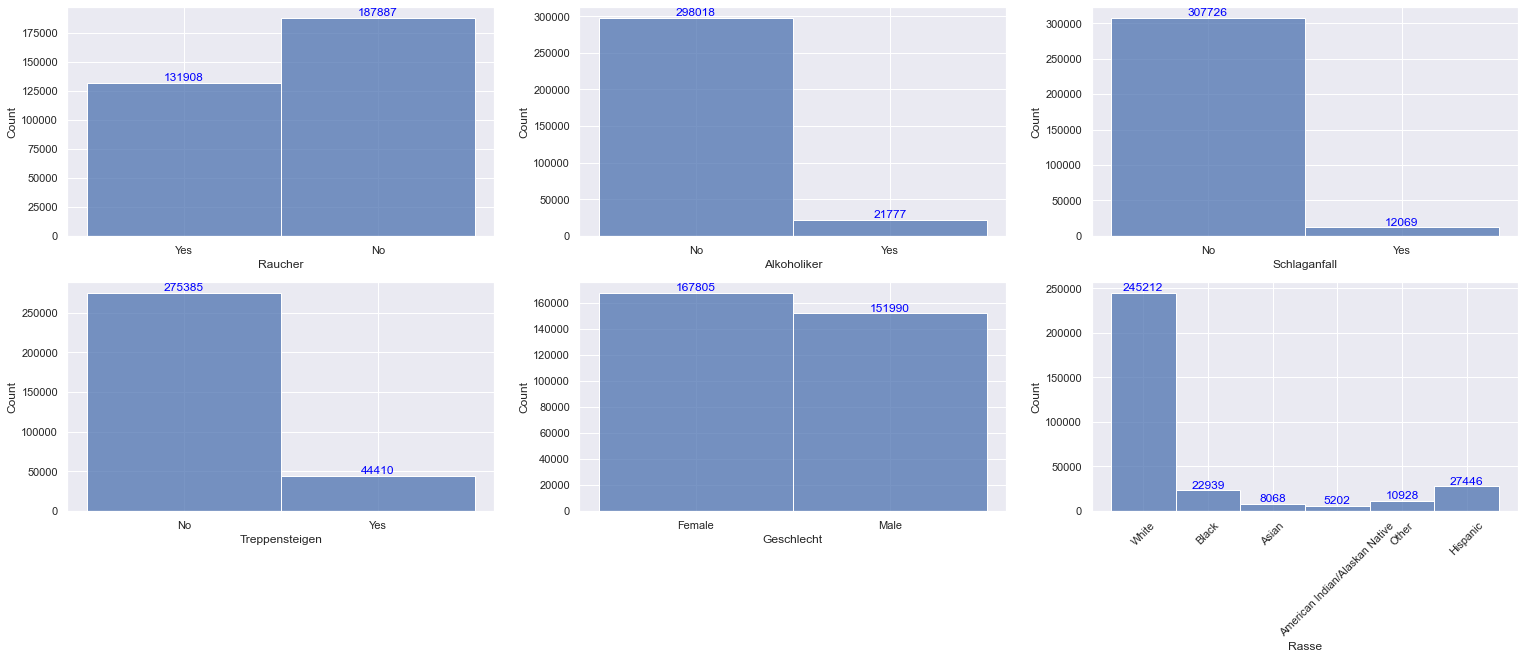

In [7]:
sns.set(rc={'figure.figsize':(26,9.27)})

plt.subplot(231)
ax1 = sns.histplot(data=df, x="Raucher")
plt.subplot(232)
ax2 = ax = sns.histplot(data=df, x="Alkoholiker")
plt.subplot(233)
ax3 = sns.histplot(data=df, x="Schlaganfall")
plt.subplot(234)
ax4 = sns.histplot(data=df, x="Treppensteigen")
plt.subplot(235)
ax5 = sns.histplot(data=df, x="Geschlecht")
plt.subplot(236)
ax6 = sns.histplot(data=df, x="Rasse")
plt.xticks(rotation=45);

# Über alle Histogramme iterieren und Daten beschriften
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='blue', ha='center', va='bottom')

Zunächst einmal sind in etwa gleich viele Männer wie Frauen in dem Datensatz enthalten. Der Frauenanteil ist nur geringfügig höher. Allerdings ist der Datensatz hinsichtlich der Rasse stark unausgeglichen. Über 76% der Probanden waren Weißhäutig, nur ca. 7,2% schwarzhäutig und 8,5% hispanoamerianer. Andere Rassen wie beispielsweise die Asiaten sind in dem Datensatz stark unterräpresentiert. Eine Aussage über den Einfluss der Rasse auf die Wahrscheinlichkeit eines Herzinfaktes ist also nur bedingt möglich und sollte mit Vorsicht behandelt werden.

Weiterhin wird ersichtlich, dass ca. 40% der Probanden angeben zu Rauchen. Nur 7% der Probanden geben an regelmäßig Alkohol zu trinken. 4% der Probanden haben bereits einen Schlaganfall erlitten und 14% haben starke Probleme beim Treppensteigen.

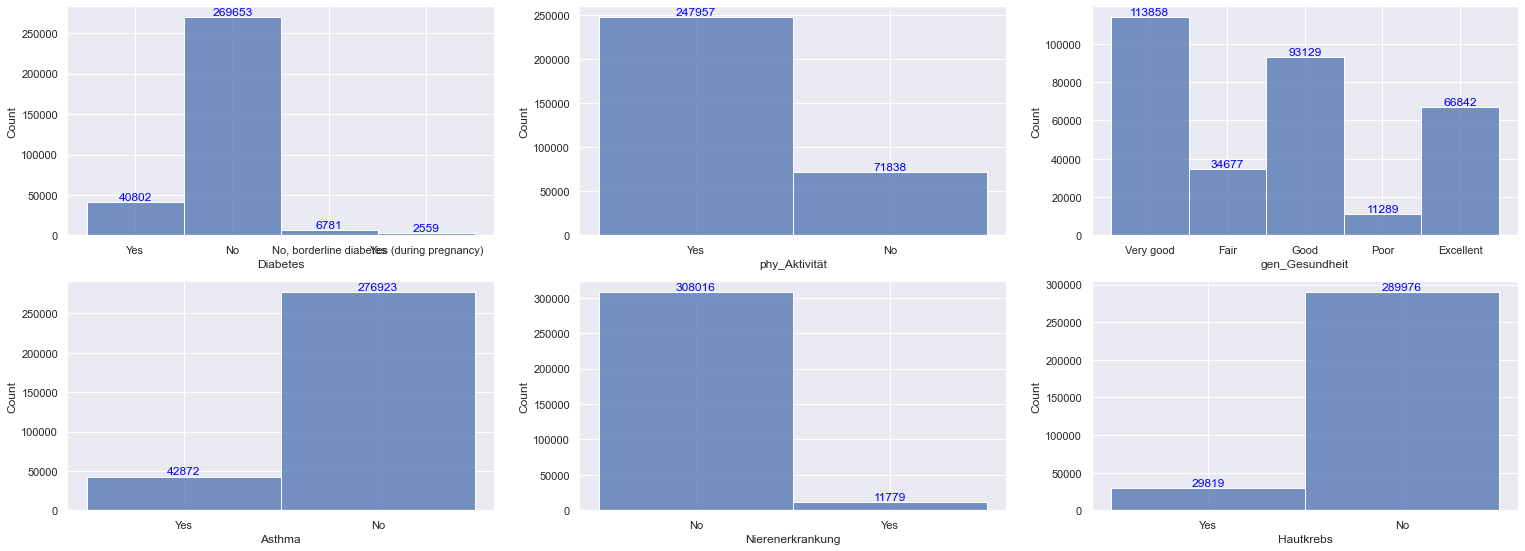

In [8]:
plt.subplot(231)
ax1 = sns.histplot(data=df, x="Diabetes")
plt.subplot(232)
ax2 = sns.histplot(data=df, x="phy_Aktivität")
plt.subplot(233)
ax3 = sns.histplot(data=df, x="gen_Gesundheit")
plt.subplot(234)
ax4 = sns.histplot(data=df, x="Asthma")
plt.subplot(235)
ax5 = sns.histplot(data=df, x="Nierenerkrankung")
plt.subplot(236)
ax6 = sns.histplot(data=df, x="Hautkrebs")

# Über alle Histogramme iterieren und Daten beschriften
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='blue', ha='center', va='bottom')

Ca. 12,5% der Probanden leiden unter Diabetis. Ein geringer Teil der Frauen hab außerdem an, an Diabetis während der Schwangerschaft gelitten zu haben. 
Ein Großteil der Befragten (77%) gibt an sportlich aktiv zu sein. Allerdings sind 23% sportlich unaktiv.

Fast 85% der Probanden ordnet die eigene Gesundheit als Exzellent, sehr gut, oder gut ein. Entsprechend geben nur 15% der Probanden an, sich gesundheitlich nicht so wohl zu fühlen. 
13,3% geben an Asthma zu haben, 3,6% besitzen eine Nierenerkrankung. Darüber hinaus haben oder hatten 9,3% der Probanden bereits Hautkrebs.

### Kontinuierliche Variablen

Für die Betrachtung der kontinuierlichen Variablen bieten sich sowohl Histogramme und auch Boxplots an.<br>
Boxplots sind Diagramme, die zur graphischen Darstellung der Verteilung von mindestens ordinalskalierten Merkmalen verwendet werden. Es fasst dabei verschiedene Streuungs- und Lagemaße in einer Darstellung zusammen. Ein Box-Plot soll schnell einen Eindruck darüber vermitteln, in welchem Bereich die Daten liegen und wie sie sich über diesen Bereich verteilen.

Ein Boxplot fasst folgende Werte in einer Darstellung zusammen:
- Minimum
- Unteres Quartil (Q1)
- Median
- Oberes Quartil (Q3)
- Maximum
- Spannweite
- Interquartilsabstand (IQR)

Darüber hinaus werden extreme Ausreißer (Q3 + 1.5 * IQR) in den Daten als Punkte dargestellt.

Ein Histogramm liefert darüber hinaus die grafische Darstellung der absoluten oder relativen Häufigkeitsverteilung eines quantitativen, klassierten Merkmals in einem speziellen Säulendiagramm: Der Flächeninhalt der einzelnen (aneinandergrenzenden) Säulen gibt die Häufigkeit der jeweiligen Klassen wider.

<AxesSubplot:xlabel='BMI', ylabel='Count'>

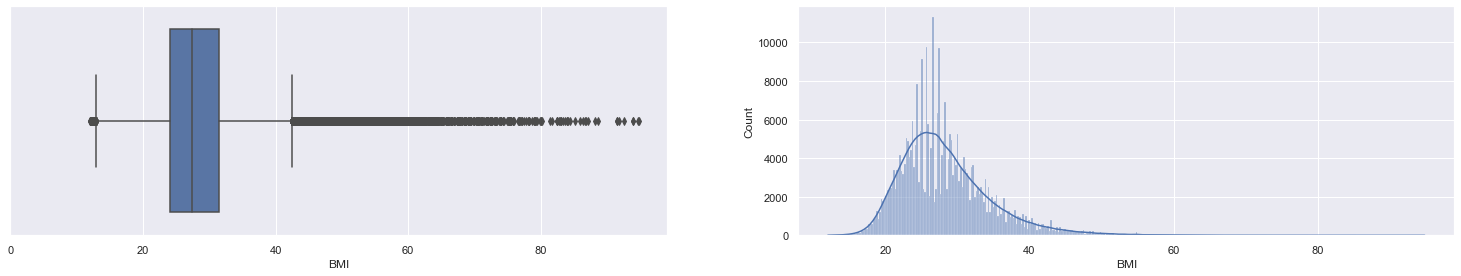

In [9]:
# BMI
sns.set(rc={'figure.figsize':(40,9.27)})

plt.subplot(231)
boxplot = sns.boxplot(data=df, x="BMI")
plt.xlim(0, None)
plt.subplot(232)
sns.histplot(data=df, x="BMI", kde=True)

50% der Probanden weisen einen BMI zwischen 24 und 31 auf. Das Minimum liegt bei einem BMI von 12, das Maximum hingegen bei 94,8. Der Median des BMI liegt bei 27.

Auffällig ist, dass viele Datenpunkte außerhalb des oberen Quartils liegen und damit als Außreißer bzw. als Punkt dargestellt werden. Es gibt demnach viele Probanden die einen sehr hohen BMI aufweisen, die nach Definition von Boxplots als Ausreißer gelten.
Der Großteil der Probanden weißt allerdings einen BMI zwischen 20 und 40 auf, wie aus dem Histogramm hervorgeht.

<AxesSubplot:xlabel='phy_Gesundheit', ylabel='count'>

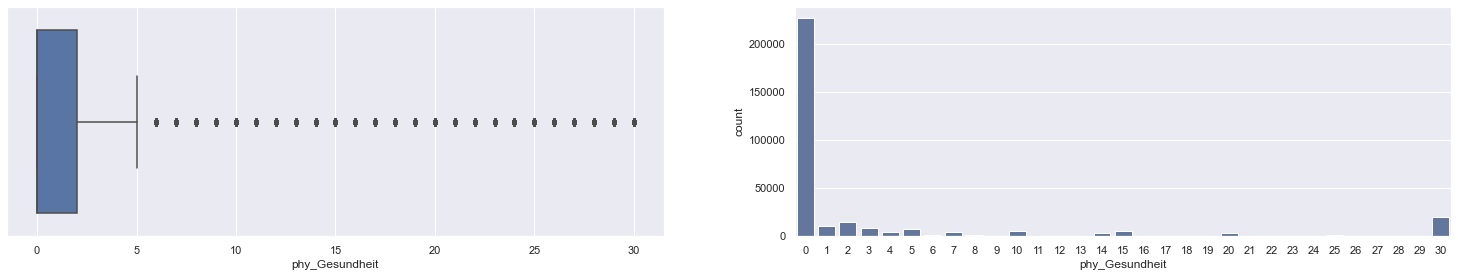

In [10]:
## phy_Gesundheit

plt.subplot(231)
sns.boxplot(data=df, x="phy_Gesundheit")
plt.subplot(232)
sns.countplot(x=df["phy_Gesundheit"].astype(int), color='#5975a4')

Die breite Masse der Probanden hat angegeben in den letzten 30 Tagen keine körperlichen Beschwerden gehabt zu haben.<br>
Aus dem Histogramm geht allerdings eine Auffälligkeit hervor: Ca. 20.000 Probanden haben angegeben an 30 von 30 Tagen körperliche Beschwerden zu haben. Es scheint also so, als hätten einige Probanden jeden Tag Beschwerden.

<AxesSubplot:xlabel='ment_Gesundheit', ylabel='count'>

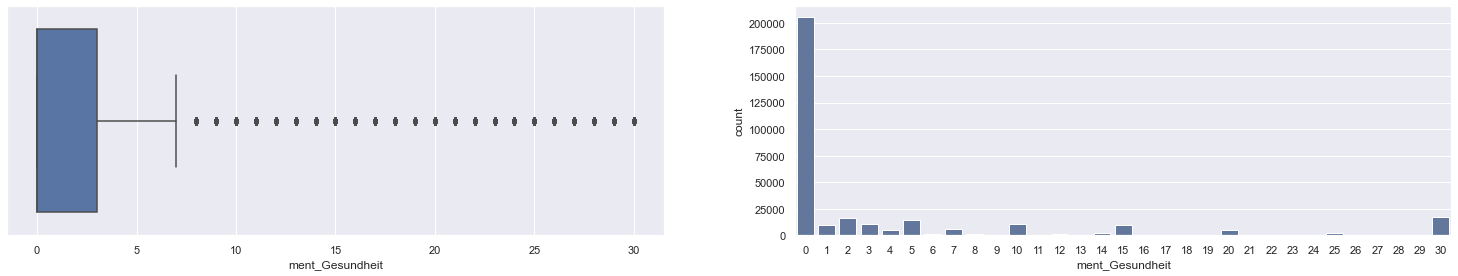

In [11]:
## ment_Gesundheit

plt.subplot(231)
sns.boxplot(data=df, x="ment_Gesundheit")
plt.subplot(232)
sns.countplot(x=df["ment_Gesundheit"].astype(int), color='#5975a4')

Die Analyse der mentalen Gesundheit der Probanden zeigt ein ähnliches Bild wie bei der physischen Gesundheit. Die meisten Probanden geben an, keine mentalen Beschwerden zu haben, bzw. haben Beschwerden nur an wenigen (<5) Tagen im Monat. <br>
Allerdings geht auch hier aus dem Histogramm hervor, dass ca. 20.000 Probanden angeben, an 30 von 30 Tagen mentale Beschwerden zu haben.

<AxesSubplot:xlabel='Altersgruppe', ylabel='count'>

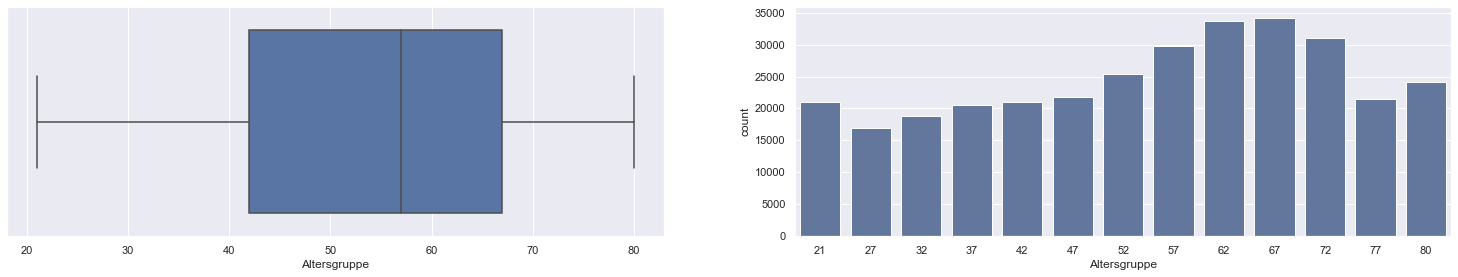

In [12]:
## Altersgruppe

plt.subplot(231)
sns.boxplot(data=df, x="Altersgruppe")
plt.subplot(232)
sns.countplot(x=df["Altersgruppe"].astype(int), color='#5975a4')

Die Analyse der Alterstruktur der Probanden zeigt, dass ältere Menschen überräpresentiert sind. 50% der Probanden sind zwischen 42 und 67 Jahre alt. Aus dem Historgramm wird ebenso ersichtlich, dass vor allem die Alterklassen 57 - 72 deutlich mehr Probanden aufweisen, als andere Alterklassen.

Vor allem hinsichtlich der Vorhersage der Wahrscheinlichkeit eines Herzinfaktes könnte dies Schwierigkeiten hervorrufen, da ältere Menschen vermutlich gefährdeter für einen Herzinfakt sind als jüngere.

<AxesSubplot:xlabel='Schlafzeit', ylabel='count'>

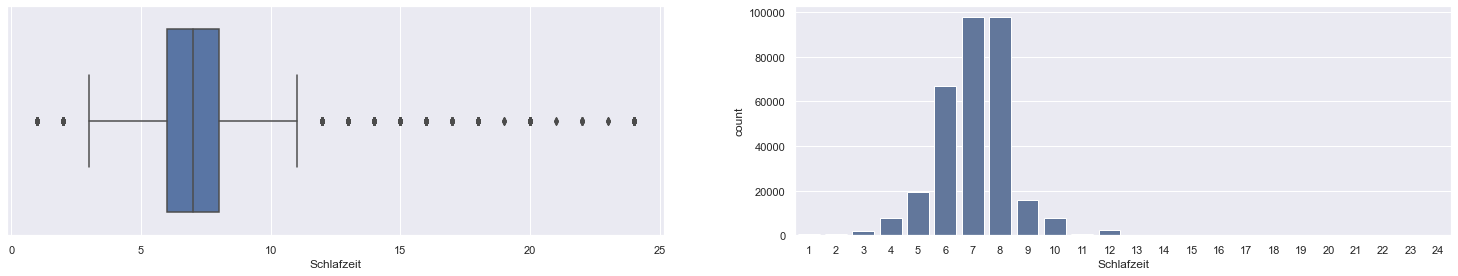

In [13]:
## Schlafzeit

plt.subplot(231)
sns.boxplot(data=df, x="Schlafzeit")
plt.subplot(232)
sns.countplot(x=df["Schlafzeit"].astype(int), color='#5975a4')

Die Analysen zeigen, dass die große Massen an Probanden zwischen 5 und 9 Stunden im Durchschnitt pro Tag schläft. Vereinzelnt schlafen die Menschen nur 4 Stunden oder sogar 10 Stunden.

Allerdings werden auch hier starke Ausreißer sichtbar. Das Minimum der Schlafzeit liegt bei 1, das Maximum bei 24. Dies sind unrealistische Werte in dem Datensatz. Kein Mensch schafft es nur 1 Stunden pro Tag im Schnitt zu schlafen. Genauso unrealistisch ist es, 24 Stunden im Schnitt - und damit den gesamten Tag - zu schlafen. 

Hier sollte im Folgenden überlegt werden, ob diese Ausreißer aus dem Datensatz gefiltert werden, da sie bei der Vorhersage Probleme bereiten könnten.

### Zielvariable

<AxesSubplot:xlabel='Herzinfakt', ylabel='count'>

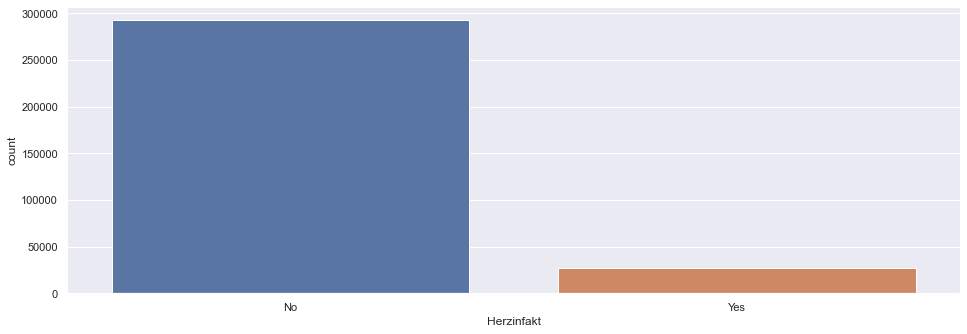

In [14]:
sns.set(rc={'figure.figsize':(16, 5.27)})
sns.countplot(x="Herzinfakt", data=df)

Die Analyse der Zielvariable *Herzinfakt (HeartDisease)* zeigt, dass nur etwa 8% der Probanden einen Herzinfakt erlitten haben. Die allermeisten Probanden haben noch keinen Herzinfakt erlitten.

## Bivariate Analyse der Spalten

Im Anschluss an die unvariate Analyse folgt die bivariate Analyse der Spalten. Der Fokus liegt hier in der Suche nach Beziehungen zwischen 2 oder mehr Spalten. Genauer gesagt ist das Ziel, eine Beziehung zischen der Zielvariabel *Herzinfakt* und einer beschreibenden Variable wie z.B. *Raucher* zu finden. Es wird also eine Art empirische Beziehung zwischen den Variablen ermittelt.

Außerdem werden Korrelationen zwischen den beschreibenden Variablen ermittelt. Eine hohe Korrelation zweier Variablen sagt aus, dass die eine Variable die andere bedingt.

Vor der bivariaten Analyse werden allerdings noch Hypothesen aufgestellt, die eine Richtung bei der Analyse der Daten vorgeben. Man stellt also Vermutungen zu den Daten auf, die im Anschluss mittels Analysen und Visualisierung belegt oder wiederlegt werden.

**Hypthesen**:

1. Menschen mit einem ungesunden Lebensstil haben ein höheres Risiko, einen Herzinfakt zu erleiden. Zu einem ungesunden Lebenstil gehört das Rauchen, ein hoher BMI, oder andere Eigenschaften wie z.B. wenig Schlafzeit, oder das regelmäßige Konsumieren von Alkohol.
2. Anzeichen des Körpers, wie z.B. eine beeinträchtigte physische Gesundheit oder ein erschwertes Treppensteigen, deuten auf einen Herzinfakt hin.
3. Menschen in einem höheren Alter erleiden häufiger einen Herzinfakt.
4. Menschen, die bereits einen Schlaganfall erlitten haben, haben ein höheres Risiko auch einen Herzinfakt zu erleiden.
5. Das Geschlecht hat keinen signifikanten Einfluss auf die Wahrscheinlichkeit, einen Herzinfakt zu bekommen.

### Kategorische Variablen

In [15]:
def calculate_probability(data_frame, variable):
    categories_of_variable = data_frame[variable].unique().tolist()
    
    for category in categories_of_variable:
        category_and_heart_disease = len(data_frame[(data_frame['Herzinfakt']=='Yes') & (data_frame[variable]==category)])
        total_of_category = len(data_frame[data_frame[variable]==category])
        
        print("Wahrscheinlichkeit für einen Herzinfakt, wenn " + variable + " die Ausprägung " + category + " hat: ", str(round(category_and_heart_disease * 100 / total_of_category, 2)) + " %")

Wahrscheinlichkeit für einen Herzinfakt, wenn Raucher die Ausprägung Yes hat:  12.16 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Raucher die Ausprägung No hat:  6.03 %


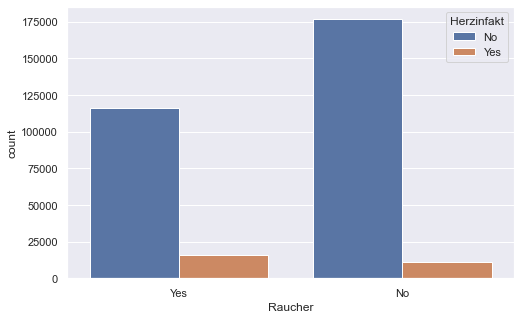

In [16]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.countplot(x="Raucher", hue='Herzinfakt', data=df)
calculate_probability(df, 'Raucher') 


Wahrscheinlichkeit für einen Herzinfakt, wenn Alkoholiker die Ausprägung No hat:  8.8 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Alkoholiker die Ausprägung Yes hat:  5.24 %


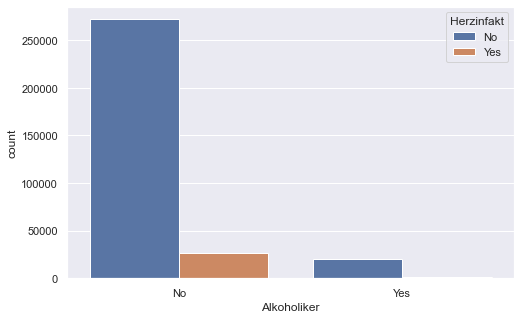

In [17]:
sns.countplot(x="Alkoholiker", hue='Herzinfakt', data=df)
calculate_probability(df, 'Alkoholiker') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Schlaganfall die Ausprägung No hat:  7.47 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Schlaganfall die Ausprägung Yes hat:  36.37 %


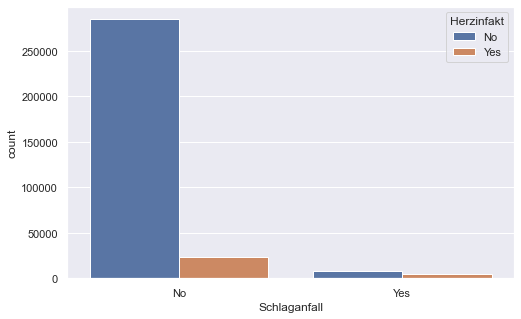

In [18]:
sns.countplot(x="Schlaganfall", hue='Herzinfakt', data=df)
calculate_probability(df, 'Schlaganfall') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Treppensteigen die Ausprägung No hat:  6.3 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Treppensteigen die Ausprägung Yes hat:  22.58 %


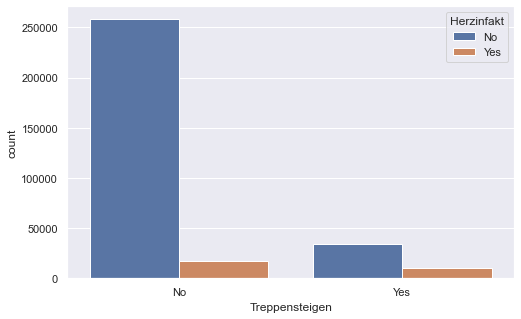

In [19]:
sns.countplot(x="Treppensteigen", hue='Herzinfakt', data=df)
calculate_probability(df, 'Treppensteigen') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Geschlecht die Ausprägung Female hat:  6.69 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Geschlecht die Ausprägung Male hat:  10.62 %


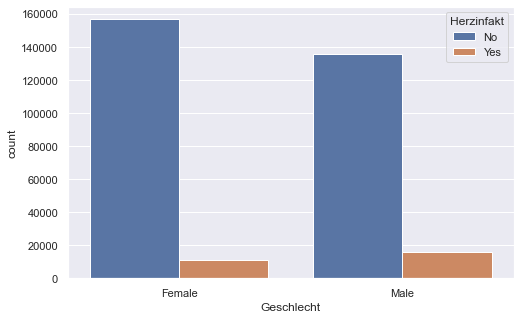

In [20]:
sns.countplot(x="Geschlecht", hue='Herzinfakt', data=df)
calculate_probability(df, 'Geschlecht') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Rasse die Ausprägung White hat:  9.18 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Rasse die Ausprägung Black hat:  7.54 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Rasse die Ausprägung Asian hat:  3.3 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Rasse die Ausprägung American Indian/Alaskan Native hat:  10.42 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Rasse die Ausprägung Other hat:  8.11 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Rasse die Ausprägung Hispanic hat:  5.26 %


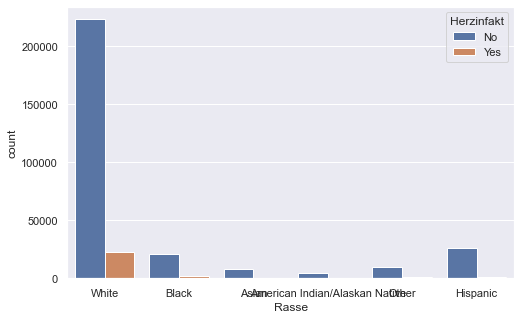

In [21]:
sns.countplot(x="Rasse", hue='Herzinfakt', data=df)
calculate_probability(df, 'Rasse') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetes die Ausprägung Yes hat:  21.95 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetes die Ausprägung No hat:  6.5 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetes die Ausprägung No, borderline diabetes hat:  11.64 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetes die Ausprägung Yes (during pregnancy) hat:  4.22 %


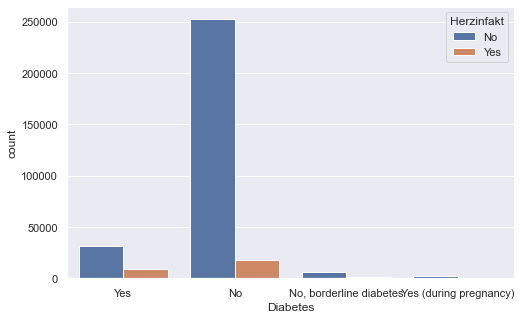

In [22]:
sns.countplot(x="Diabetes", hue='Herzinfakt', data=df)
calculate_probability(df, 'Diabetes')

Wahrscheinlichkeit für einen Herzinfakt, wenn phy_Aktivität die Ausprägung Yes hat:  7.05 %
Wahrscheinlichkeit für einen Herzinfakt, wenn phy_Aktivität die Ausprägung No hat:  13.76 %


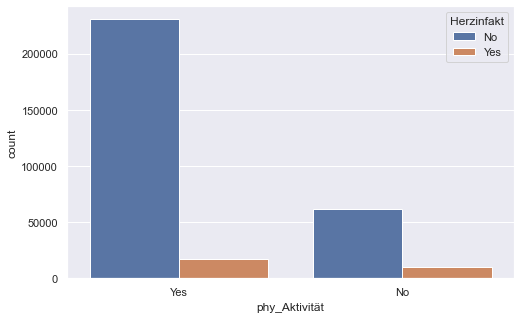

In [23]:
sns.countplot(x="phy_Aktivität", hue='Herzinfakt', data=df)
calculate_probability(df, 'phy_Aktivität')

Wahrscheinlichkeit für einen Herzinfakt, wenn gen_Gesundheit die Ausprägung Very good hat:  4.73 %
Wahrscheinlichkeit für einen Herzinfakt, wenn gen_Gesundheit die Ausprägung Fair hat:  20.43 %
Wahrscheinlichkeit für einen Herzinfakt, wenn gen_Gesundheit die Ausprägung Good hat:  10.26 %
Wahrscheinlichkeit für einen Herzinfakt, wenn gen_Gesundheit die Ausprägung Poor hat:  34.1 %
Wahrscheinlichkeit für einen Herzinfakt, wenn gen_Gesundheit die Ausprägung Excellent hat:  2.24 %


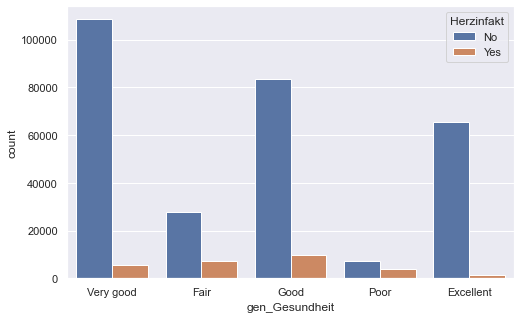

In [24]:
sns.countplot(x="gen_Gesundheit", hue='Herzinfakt', data=df)
calculate_probability(df, 'gen_Gesundheit')

TypeError: can only concatenate str (not "int") to str

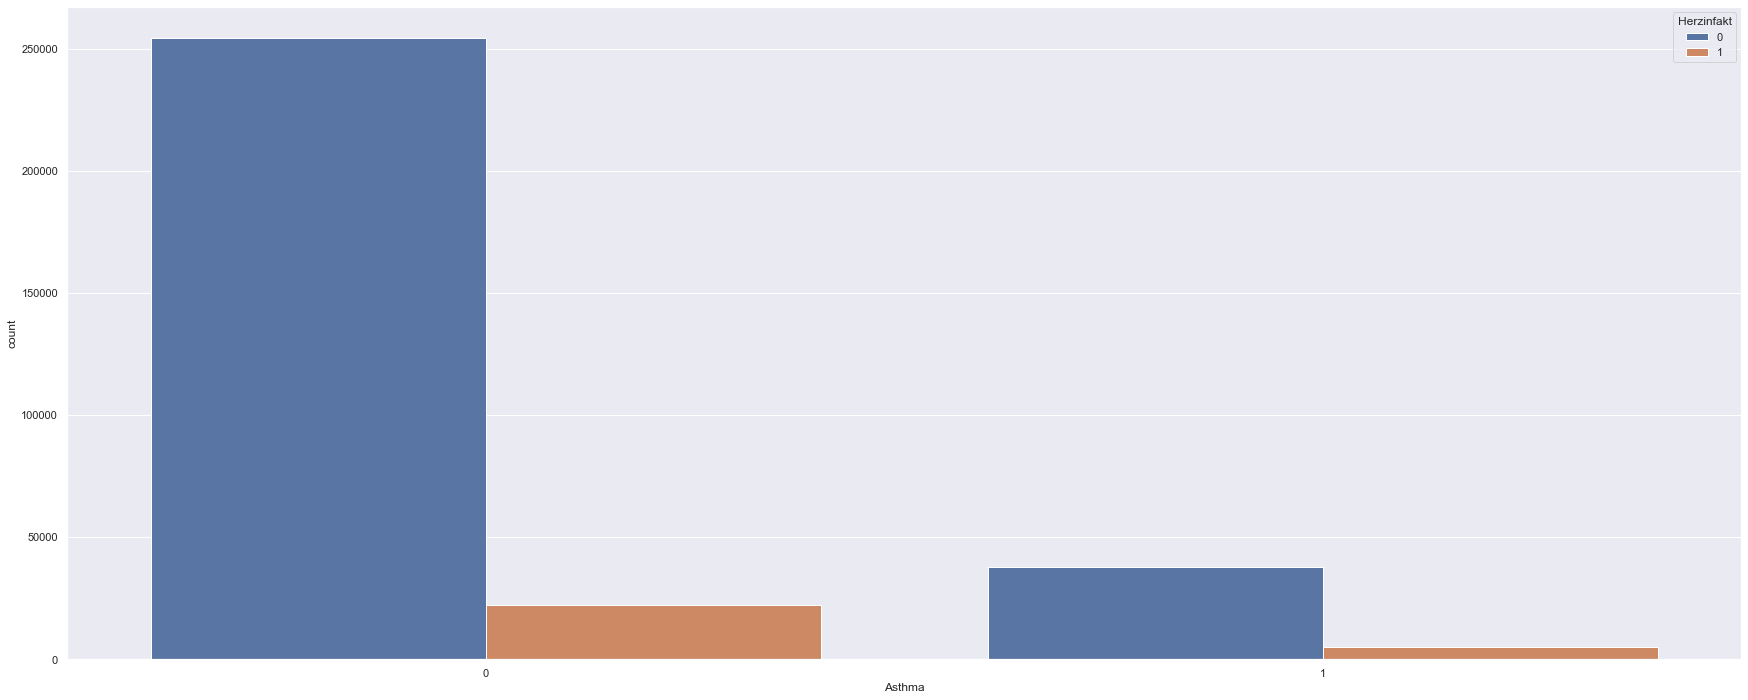

In [61]:
sns.countplot(x="Asthma", hue='Herzinfakt', data=df)
calculate_probability(df, 'Asthma')

Wahrscheinlichkeit für einen Herzinfakt, wenn Nierenerkrankung die Ausprägung No hat:  7.77 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Nierenerkrankung die Ausprägung Yes hat:  29.33 %


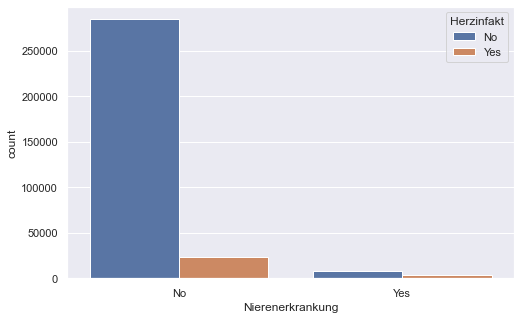

In [26]:
sns.countplot(x="Nierenerkrankung", hue='Herzinfakt', data=df)
calculate_probability(df, 'Nierenerkrankung')

Wahrscheinlichkeit für einen Herzinfakt, wenn Hautkrebs die Ausprägung Yes hat:  16.7 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Hautkrebs die Ausprägung No hat:  7.72 %


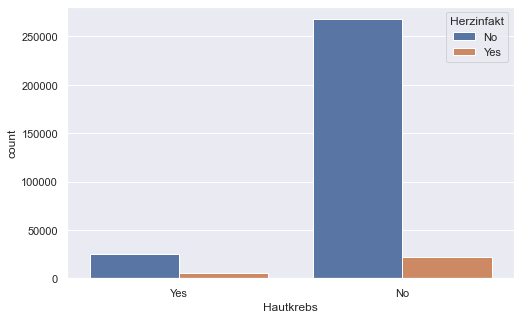

In [27]:
sns.countplot(x="Hautkrebs", hue='Herzinfakt', data=df)
calculate_probability(df, 'Hautkrebs')

### Kontinuierliche Variablen

<AxesSubplot:xlabel='Herzinfakt', ylabel='BMI'>

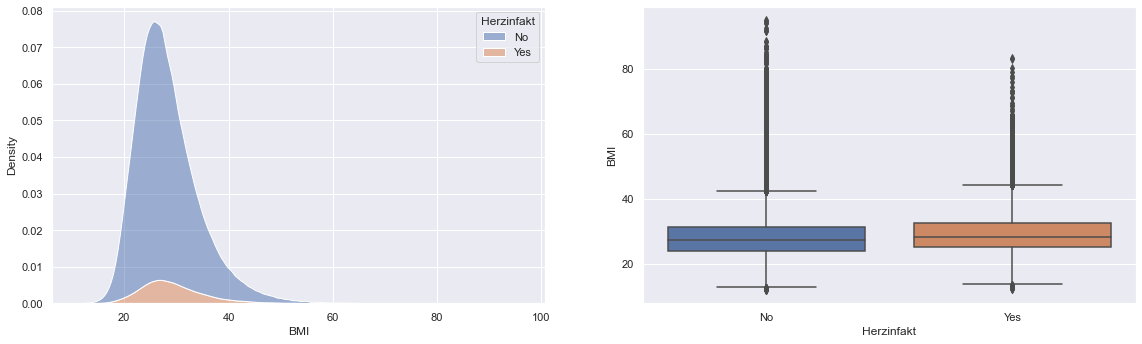

In [28]:
sns.set(rc={'figure.figsize':(30, 12)})
plt.subplot(232)
sns.kdeplot(data=df, x="BMI", hue="Herzinfakt", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['Herzinfakt'], y=df['BMI'])

Der BMI trägt überraschender Weise nicht signifikant dazu bei, dass Probanden einen Herzinfakt erleiden. Die Boxplots zeigen, dass der Median für Menschen mit einem Herzinfakt leicht erhöht ist, ebenso wie das Maximum. 

Auffällig ist auch, dass die starken Ausreißer im BMI (> 80) nahezu alle keinen Herzinfakt erlitten haben.<

<AxesSubplot:xlabel='Herzinfakt', ylabel='phy_Gesundheit'>

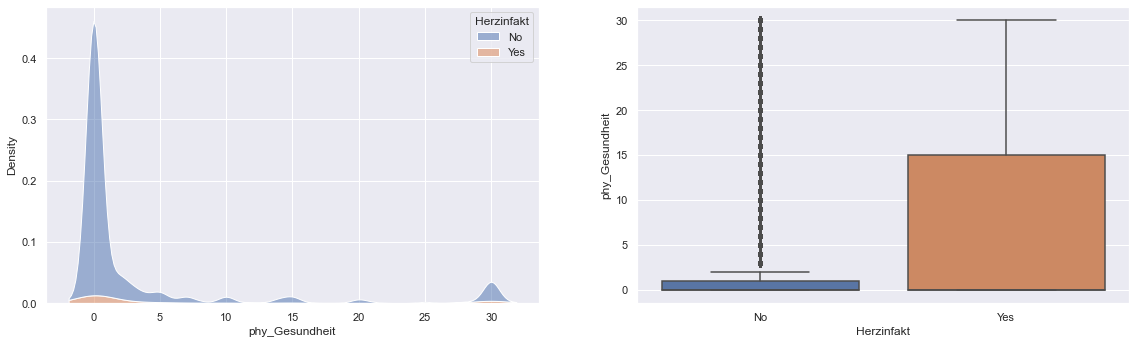

In [29]:
plt.subplot(232)
sns.kdeplot(data=df, x="phy_Gesundheit", hue="Herzinfakt", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['Herzinfakt'], y=df['phy_Gesundheit'])

Die Anzahl an Tagen, an denen ein Proband physische Beschwerden aufweist, hat einen Einfluss auf die Wahrscheinlichkeit eines Herzinfaktes. Die Spannweite des Boxplots zeigt, dass ein Großteil der Probanden mit einem Herzinfakt häufiger physische Beschwerden haben.

<AxesSubplot:xlabel='Herzinfakt', ylabel='ment_Gesundheit'>

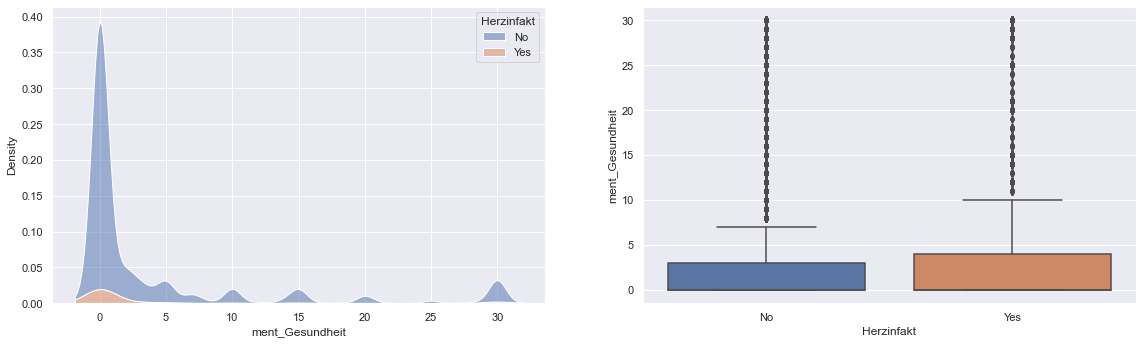

In [30]:
plt.subplot(232)
sns.kdeplot(data=df, x="ment_Gesundheit", hue="Herzinfakt", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['Herzinfakt'], y=df['ment_Gesundheit'])

<AxesSubplot:xlabel='Herzinfakt', ylabel='Altersgruppe'>

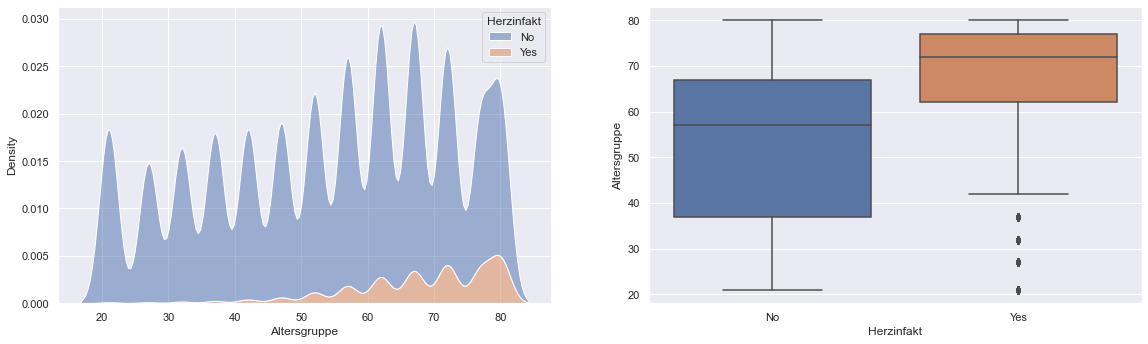

In [31]:
plt.subplot(232)
sns.kdeplot(data=df, x="Altersgruppe", hue="Herzinfakt", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['Herzinfakt'], y=df['Altersgruppe'])

Das Alter des Probanden hat einen großen Einfluss auf die Wahrscheinlichkeit einen Herzinfakt zu bekommen. Das KDE-Plot zeigt sehr deutlich, dass je älter ein Proband ist auch sein Risiko steigt, einen Herzinfakt zu erleiden.<br>
Vor allem die Probanden mit einem Alter > 60 Jahre haben ein deutlich erhöhtes Risiko.

<AxesSubplot:xlabel='Herzinfakt', ylabel='Schlafzeit'>

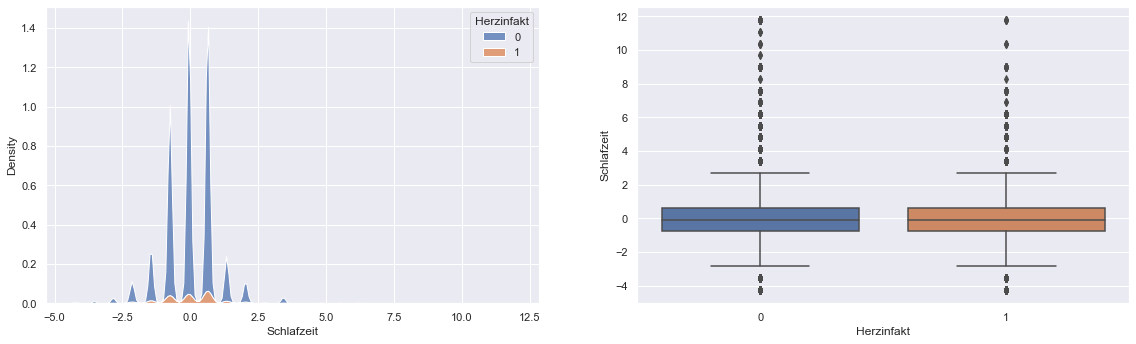

In [60]:
plt.subplot(232)
sns.kdeplot(data=df, x="Schlafzeit", hue="Herzinfakt", shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['Herzinfakt'], y=df['Schlafzeit'])

Zu wenig oder zu viel Schlaf eines Probanden hat offensichtlich keine negativen Auswirkungen auf die Wahrscheinlichkeit einen Herzinfakt zu bekommen.
Vor allem das Boxplot zeigt, dass der Median und auch das Minimum / Maximum fast identisch sind.

### Korrelationsmatrix

Mit einer Korrelationsmatrix können die Korrelationen zwischen einzelnen Variablen dargestellt werden. Eine Korrelation misst die Stärke einer statistischen Beziehung von zwei Variablen zueinander.
Je höher der Korrelationskoeffizient ist, desto stärker ist die Beziehung zwischen den Variablen. Bei einem Wert von 1 bedeutet dies, das die eine Variable die andere Variable bedingt.

Die Korrelationsmatrix wird mithilfe der Funktion .corr() der Bibliothek pandas erstellt. Diese akzeptiert lediglich numerische Werte, alle anderen Werte oder Spalten werden automatisch exkludiert oder ignoriert. Damit auch die anderen Spalten aus dem Datensatz berücksichtigt werden, werden folgende Vorverarbeitungen an dem Datensatz vorgenommen:
- **Standardisierung** der kontinuierlichen / numerischen Spalten
- **IntegerEncode** Spalten mit 2 Ausprägungen
- **OneHotEncode** Spalten mit mehr als 2 Ausprägungen

Diese Vorverarbeitungen sind auch sinnvoll für Machine Learning Modelle. ML-Modelle können häufig besser mit Variablen umgehen, die zum einen standardisiert wurden und zumdem numerisch sind. Die Vorhersageperformance vieler ML-Modelle kann mit diesen einfachen Schritten verbessert werden.

**Standardisierung**:<br>

Kontinuierliche Variablen in einem Dataset weisen oft unterschiedliche Skalen auf. So hat die Variable **BMI** beispielsweise eine Skala von 12.02 bis 94.85, die Variable **SleepTime** hingegen eine Skala von 1 bis 24. Dies kann die Vorhersageperformance viele Machine Learning Modelle beeinträchtigen. Nicht skalierte Daten können auch die Konvergenz vieler gradientenbasierter Modelle verlangsamen oder sogar verhindern.

<div>
<img src="StandardScaler.png" width="400"/>
</div>

Ziel der Standardisierung ist, dass alle Variabeln nach der Konvertierung einen Durchschnitt von 0 (µ = 0) und eine Standardabweichung von 1 (σ = 1) aufweisen.

**IntegerEncode**:<br>

Binäre Spalten in dem Datensatz, wie z.B. *Smoking* (Yes, No) werden durch das IntegerEncode in 0 und 1 umgewandelt. Für die Werte "Yes" wird entsprechend eine 1 gesetzt, für die Werte "No" eine 0.

**OneHotEncoding**:<br>

Viele Machine Learning Modelle können nur schwer mit kategorischen Daten als Input umgehen. Ähnlich wie bei den kontinuierlich Variablen ist auch hier das Problem, dass einige Variablen nur 2 Ausprägungen besitzen, andere dafür aber 20 oder mehr. 
Viel besser können Machine Learning Modelle mit numerischen Werte umgehen.

Beim OneHotEncoding wird jeder kategorische Wert in eine neue kategorische Spalte umgewandelt und diesen Spalten ein binärer Wert von 1 oder 0 zugewiesen. Pro Ausprägung einer Spalte existiert nach Anwendung des OneHotEncoding demnach eine neue Spalte im Datensatz

<div>
<img src="one_hot_encoding.png" width="700"/>
</div

#### Standardisierung der Variablen

In [33]:
## Standardisierung der kontinuierlichen Variablen

Scaler = StandardScaler()
df[con_cols] = Scaler.fit_transform(df[con_cols])

df[con_cols].head()

,BMI,phy_Gesundheit,ment_Gesundheit,Altersgruppe,Schlafzeit
0,-1.844750,-0.046751,3.281069,0.149220,-1.460354
1,-1.256338,-0.424070,-0.490039,1.447159,-0.067601
2,-0.274603,2.091388,3.281069,0.713541,0.628776
3,-0.647473,-0.424070,-0.490039,1.277863,-0.763977
4,-0.726138,3.097572,-0.490039,-0.697262,0.628776


Nach Anwendung des StandardScaler haben alle kontinuierlichen Variabeln einen Durchschnitt von 0 (µ = 0) und eine Standardabweichung von 1 (σ = 1). 

#### OneHotEncoding

In [34]:
# IntegerEncode Spalten mit 2 Ausprägungen
for col in ['Herzinfakt', 'Raucher', 'Alkoholiker', 'Schlaganfall', 'Treppensteigen', 'Geschlecht', 'phy_Aktivität', 'Asthma', 'Nierenerkrankung', 'Hautkrebs']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# OneHotEncode Spalten mit mehr als 2 Ausprägungen
df = pd.get_dummies(df, columns=['Rasse', 'Diabetes', 'gen_Gesundheit'], prefix = ['Rasse', 'Diabetes', 'gen_Gesundheit'])

In [35]:
df.head()

,Herzinfakt,BMI,Raucher,Alkoholiker,Schlaganfall,phy_Gesundheit,ment_Gesundheit,Treppensteigen,Geschlecht,Altersgruppe,...,Rasse_White,Diabetes_No,"Diabetes_No, borderline diabetes",Diabetes_Yes,Diabetes_Yes (during pregnancy),gen_Gesundheit_Excellent,gen_Gesundheit_Fair,gen_Gesundheit_Good,gen_Gesundheit_Poor,gen_Gesundheit_Very good
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,0.149220,...,1,0,0,1,0,0,0,0,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,1.447159,...,1,1,0,0,0,0,0,0,0,1
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,0.713541,...,1,0,0,1,0,0,1,0,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,1.277863,...,1,1,0,0,0,0,0,1,0,0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,-0.697262,...,1,1,0,0,0,0,0,0,0,1


Nach Anwendung des OneHotEncoding gibt es neue Spalten wie z.B. die Spalte **Race_White**, die die Ausprägungen 0 und 1 besitzt. Für alle kategorischen Werte der Spalten 'Race', 'Diabetic' und 'GenHealth' gibt es nun eine dedizierte Spalte mit den Werte 0 und 1.

Nun kann die Korrelationsmatrix erstellt werden. Hierfür wird wie oben beschrieben die Funktion .corr() auf das DataFrame angewendet. Anschließend wird die Korrelationsmatrix - die zunächst als einfache Tabelle vorliegt - mithilfe der Bibliothek **seaborn** visualisiert. Hierfür gibt es die Funktion *heatmap*.

<AxesSubplot:>

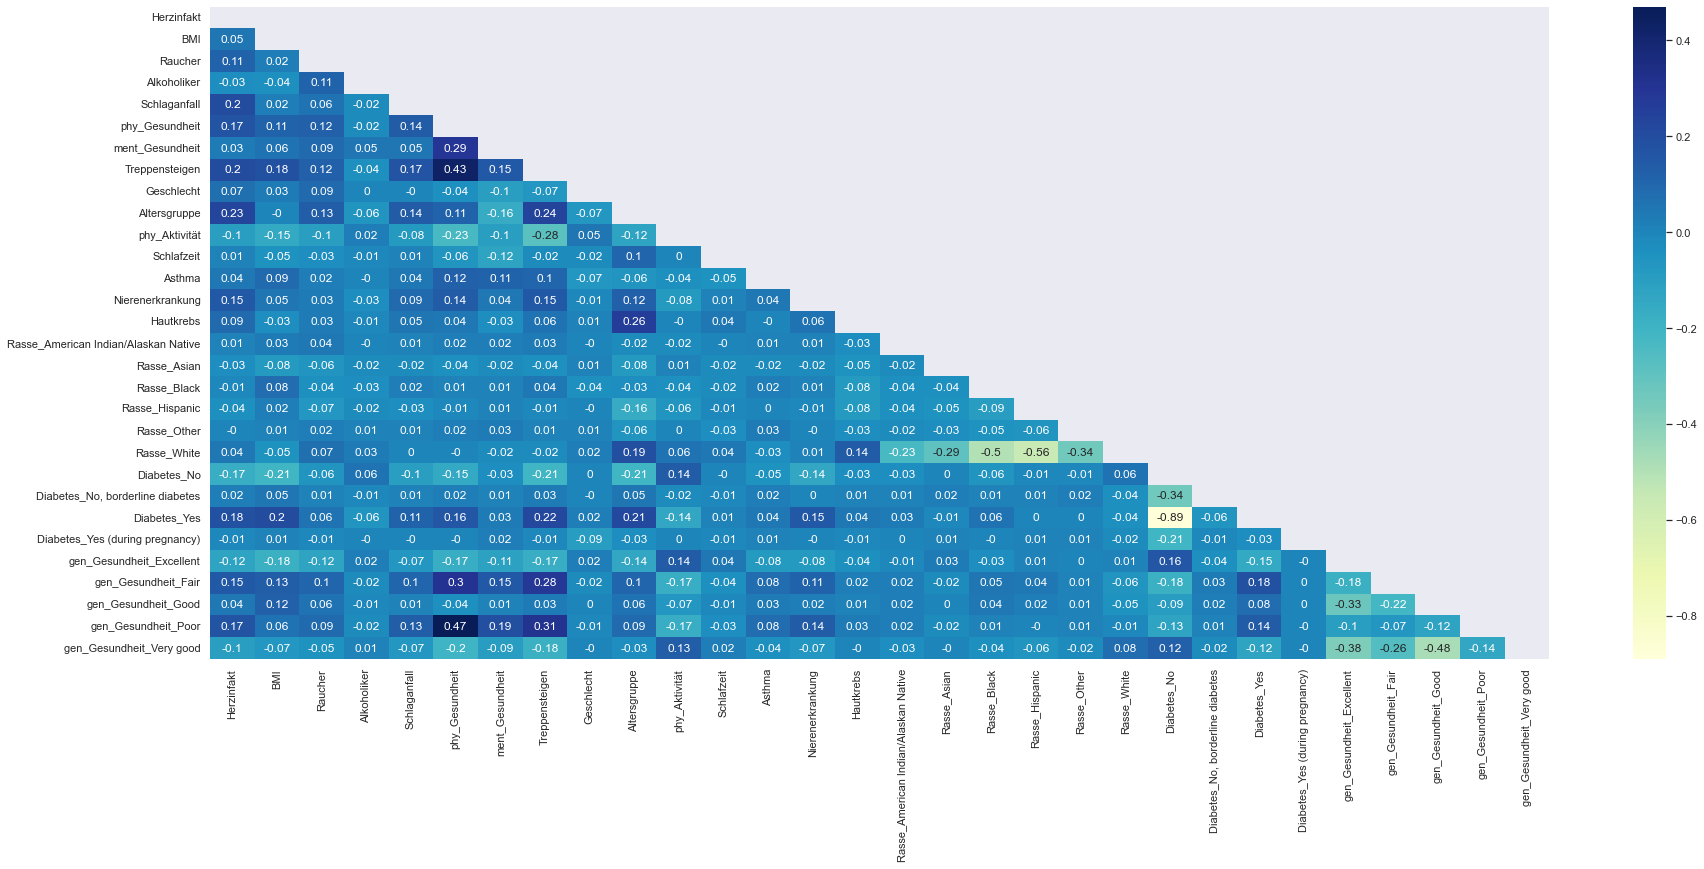

In [36]:
## Korrelationsmatrix erstellen.
correlation = df.corr().round(2)

## Maske für Heatmap erstellen, um die Werte oberhalb der Hauptdiagonale auszublenden.
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,annot=True ,cmap='YlGnBu', mask=mask)

Bewertung Korrelationsmatrix

## Machine Learning Modell erstellen

Bislang wurden die Daten analysiert mithilfe von verschiedenen Visualisierungen. Dabei wurde ein Verständnis für die Daten entwickelt.
Nun soll für die Vorhersage der Zielvariable **HeartDisease** ein bzw. mehrere Machine Learning Modelle erstellt werden. Dabei werden verschiedene Verfahren betrachtet, um zu ermitteln, welches der Verfahren die besten Ergebnisse erzielt. Dies ist ein gängiges Vorgehen im Data Science Bereich, da sich die Modelle je nach Datensatz unterschiedlich verhalten können.

Verwendete Machine Learning Modelle:
- K nächste Nachbarn (KNN)
- DecisionTree
- RandomForest
- Support Vector Machine
- Neurales Netz


Nachdem die letzten Vorbereitung der Daten für die Machine Learning Modelle vorgenommen wurden, werden die Daten nun in Trainings- und Testdaten unterteilt. Dies ist ebenfalls ein weit verbreitetes Vorgehen im Data Science Umfeld.
Die Idee ist, das Modell auf einem Teil der Daten zu trainieren (Trainingsdaten) und das Modell anschließend auf einem Datensatz zu testen, dass das Modell zuvor noch nicht gesehen hat (Testdaten). 

Eine gängige Aufteilung ist hierbei 80/20, wobei 80% Trainingsdaten und 20% Testdaten verwendet werden. Für die Aufteilung wird die Funktion *train_test_split* der Bibliothek sklearn verwendet, die mit nur wenig Input Parametern die Aufteilung der Daten übernimmt.

In [37]:
## Aufteilung des DataFrame in Trainings- und Testdaten

# DataFrame mit Feature-Spalten erstellen
features = df.drop(columns =['Herzinfakt'], axis = 1)

# DataFrame mit Zielvariable erstellen 
target = df['Herzinfakt']

# Erstellen der DataFrames für Trainings- und Testdaten
# shuffle = True -> Die Daten werden vor der Zuteilung zufällig verteilt.
# test_size = .2 -> Die größe des Testdatensatzes soll 20% der Gesamtgröße ausmachen.
# random_state = 42 -> Steuert das Shuffling der Daten. Mit einer festen Zahl werden die Daten immer identisch geshuffelt. Dies ist sinnvoll, um reproduzierbare Ergebnisse der ML-Modelle zu haben.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 42)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 29)
Shape of testing feature: (63959, 29)
Shape of training label: (255836,)
Shape of training label: (63959,)


Für alle ausgewählten Modelle soll nach dem Training eine Validierung der Genauigkeit erfolgen. Da diese Validierung immer nach demselben Schema erfolgt und dieselben Metriken betrachtet werden sollen, wird im folgenden eine Funktion *evaluate_model* erstellt, mit der die Modelle später einfacher validiert werden können, da die Ergebnisse in einer standardisierten Form vorliegen.

In [38]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Vorhersagen für das Modell erstellen
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()

    print(f"Evaluierungsdauer des Modells: {round(end_time - start_time, 2)} s\n")

    # Erstellen der Metriken accuracy (acc) und precision (prec)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'cm': cm}

### KNN (n = 5)

In [39]:
# Erstellen eines K-nächste-Nachbarn-Modell
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
import time
knn = KNeighborsClassifier(n_neighbors = 5)

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

knn_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {knn_training} s\n")

# Evaluieren des Modells
knn_eval = evaluate_model(knn, X_test, y_test)

# Metriken ausgeben
print('Accuracy:', round(knn_eval['acc'], 4) * 100, " %")
print('Precision:', round(knn_eval['prec'], 4) * 100, " %")

print('Confusion Matrix:\n', knn_eval['cm'])

Trainingsdauer des Modells: 0.03 s

Evaluierungsdauer des Modells: 250.74 s

Accuracy: 90.58  %
Precision: 37.97  %
Confusion Matrix:
 [[57251  1116]
 [ 4909   683]]


### KNN (n = 3)

In [40]:
# Erstellen eines K-nächste-Nachbarn-Modell
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
import time
knn3 = KNeighborsClassifier(n_neighbors = 3)

start_time = time.time()
knn3.fit(X_train, y_train)
end_time = time.time()

knn3_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {knn3_training} s\n")

# Evaluieren des Modells
knn3_eval = evaluate_model(knn3, X_test, y_test)

# Metriken ausgeben
print('Accuracy:', round(knn3_eval['acc'], 4) * 100, " %")
print('Precision:', round(knn3_eval['prec'], 4) * 100, " %")

print('Confusion Matrix:\n', knn3_eval['cm'])

Trainingsdauer des Modells: 0.04 s

Evaluierungsdauer des Modells: 191.21 s

Accuracy: 89.78  %
Precision: 32.45  %
Confusion Matrix:
 [[56554  1813]
 [ 4721   871]]


### KNN (n = 1)

In [41]:
# Erstellen eines K-nächste-Nachbarn-Modell
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
import time
knn1 = KNeighborsClassifier(n_neighbors = 1)

start_time = time.time()
knn1.fit(X_train, y_train)
end_time = time.time()

knn1_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {knn_training} s\n")

# Evaluieren des Modells
knn1_eval = evaluate_model(knn1, X_test, y_test)

# Metriken ausgeben
print('Accuracy:', round(knn1_eval['acc'], 4) * 100, " %")
print('Precision:', round(knn1_eval['prec'], 4) * 100, " %")

print('Confusion Matrix:\n', knn1_eval['cm'])

Trainingsdauer des Modells: 0.03 s

Evaluierungsdauer des Modells: 157.34 s

Accuracy: 86.94  %
Precision: 23.73  %
Confusion Matrix:
 [[54360  4007]
 [ 4345  1247]]


### Decision Tree

In [42]:
from sklearn import tree

# Erstellen eines Einscheidungsbaums 
# https://scikit-learn.org/stable/modules/tree.html

# random_state = 42 -> Steuert das Shuffling der Daten. Mit einer festen Zahl werden die Daten immer identisch geshuffelt. Dies ist sinnvoll, um reproduzierbare Ergebnisse der ML-Modelle zu haben.
clf = tree.DecisionTreeClassifier(random_state=42)

start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

clf_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {clf_training} s\n")

# Evaluieren des Modells
clf_eval = evaluate_model(clf, X_test, y_test)

# Metriken ausgeben
print('Accuracy:', round(clf_eval['acc'], 4) * 100, " %")
print('Precision:', round(clf_eval['prec'], 4) * 100, " %")

print('Confusion Matrix:\n', clf_eval['cm'])

Trainingsdauer des Modells: 1.37 s

Evaluierungsdauer des Modells: 0.02 s

Accuracy: 86.19  %
Precision: 23.25  %
Confusion Matrix:
 [[53715  4652]
 [ 4183  1409]]


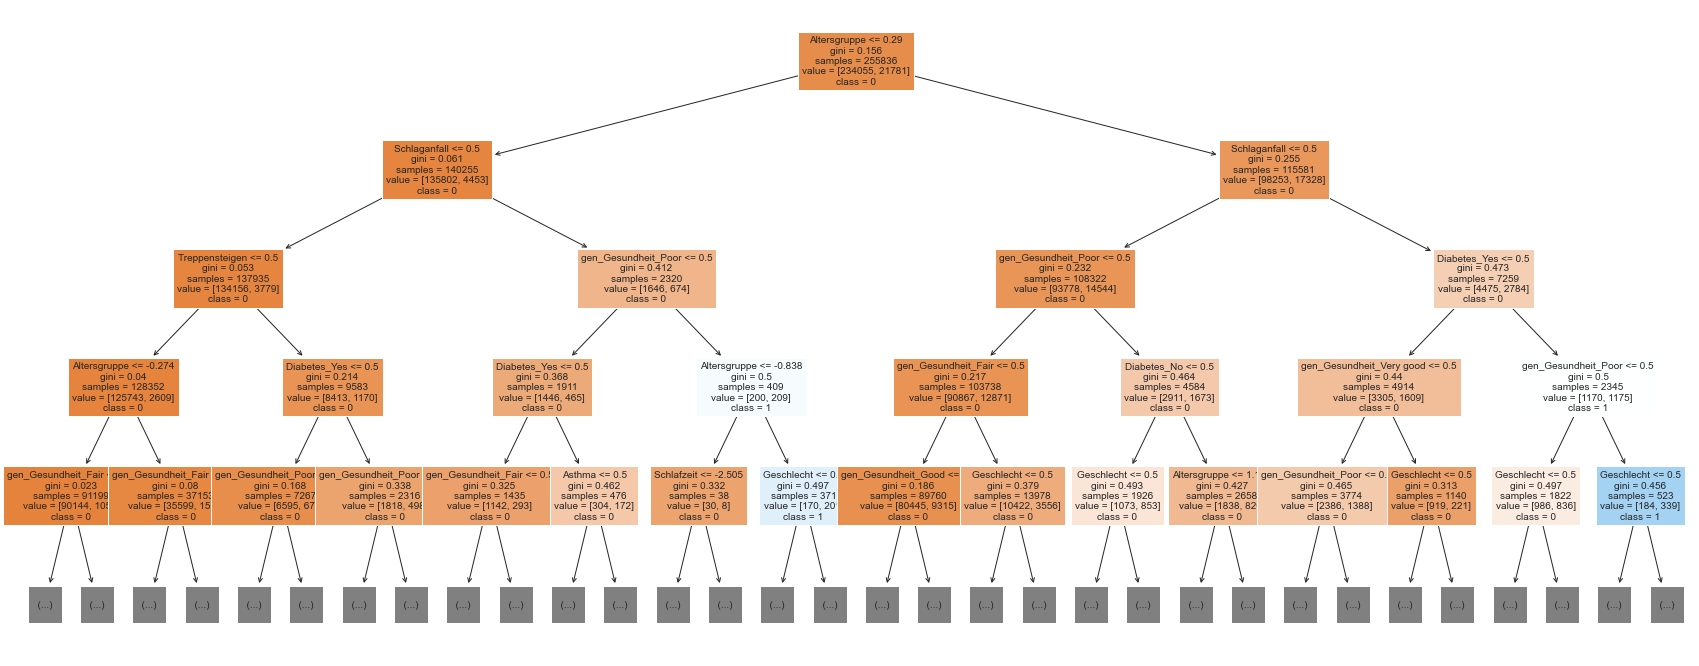

In [43]:
from sklearn import tree

tree.plot_tree(clf,
               feature_names = features.columns,
               class_names = target.unique().astype(str),
               filled = True,
               max_depth = 4,
              fontsize = 10)
plt.show()

### RandomForest

<div>
<img src="Random_forest.png" width="500"/>
</div>

In [44]:
# Erstellen eines RandomForest Modells
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

rfc = RandomForestClassifier(random_state=0)

start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()

rfc_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {rfc_training} s\n")

# Evaluieren des Modells
rfc_eval = evaluate_model(rfc, X_test, y_test)

# Metriken ausgeben
print('Accuracy:', round(rfc_eval['acc'], 4) * 100, " %")
print('Precision:', round(rfc_eval['prec'], 4) * 100, " %")
print('Confusion Matrix:\n', rfc_eval['cm'])

Trainingsdauer des Modells: 23.56 s

Evaluierungsdauer des Modells: 1.42 s

Accuracy: 90.34  %
Precision: 34.92  %
Confusion Matrix:
 [[57107  1260]
 [ 4916   676]]


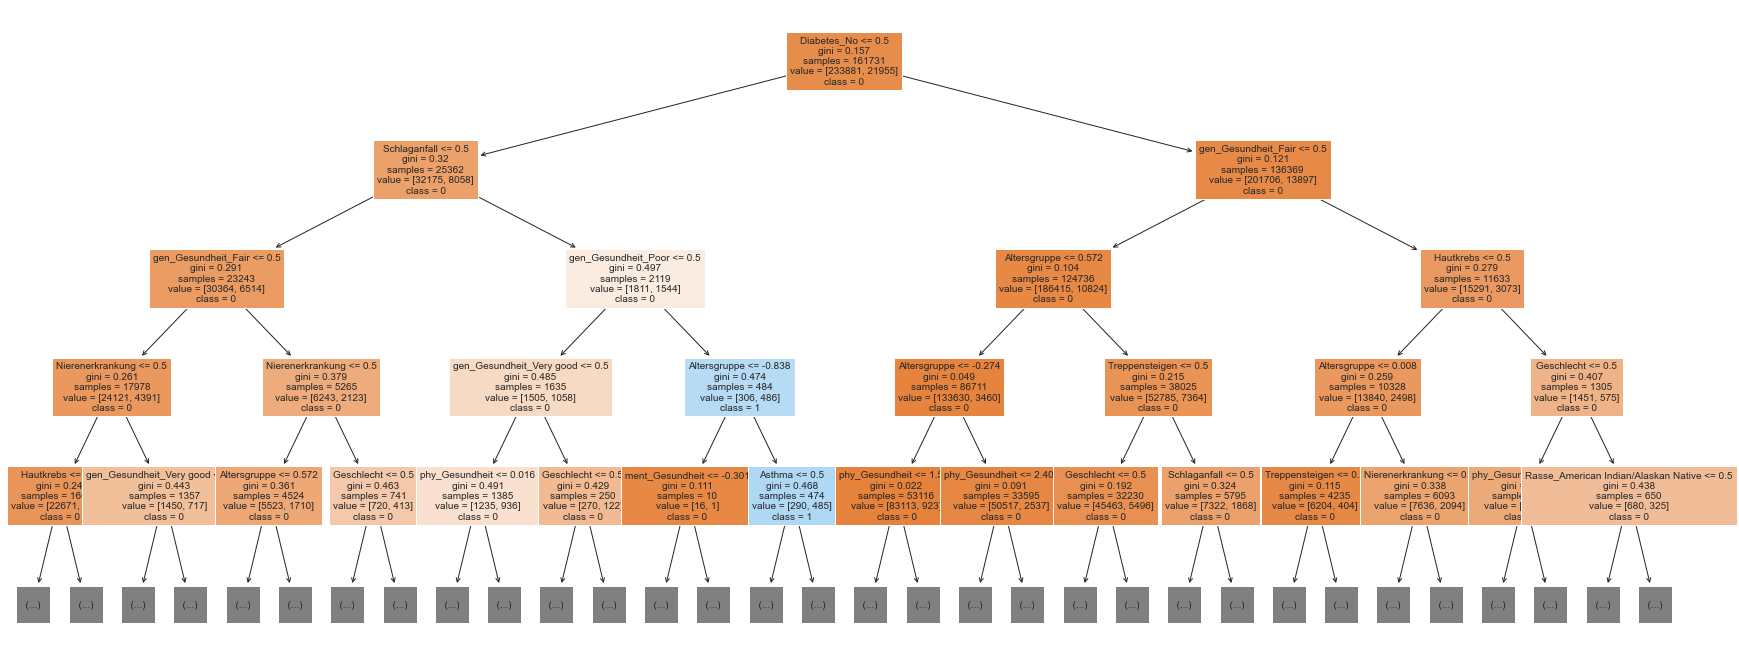

In [45]:
tree.plot_tree(rfc.estimators_[0],
               feature_names = features.columns,
               class_names = target.unique().astype(str),
               filled = True,
               max_depth = 4,
              fontsize = 10)
plt.show()

### Support Vector Machine

<div>
<img src="Support_Vector_Machine.png" width="500"/>
</div>

In [46]:
# Erstellung eines Support Vector Machine Modells
# https://scikit-learn.org/stable/modules/svm.html

from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=0, tol=1e-5)

start_time = time.time()
svm.fit(X_train, y_train.ravel()) 
end_time = time.time()

svm_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {svm_training} s\n")

# predicting the values
y_pred = svm.predict(X_test)

# Evaluate Model
svm_eval = evaluate_model(svm, X_test, y_test)

# Print result
print('Accuracy:', round(svm_eval['acc'], 4) * 100, " %")
print('Precision:', round(svm_eval['prec'], 4) * 100, " %")

print('Confusion Matrix:\n', svm_eval['cm'])

Trainingsdauer des Modells: 42.36 s

Evaluierungsdauer des Modells: 0.01 s

Accuracy: 91.39  %
Precision: 61.86000000000001  %
Confusion Matrix:
 [[58232   135]
 [ 5373   219]]


### Neural Network

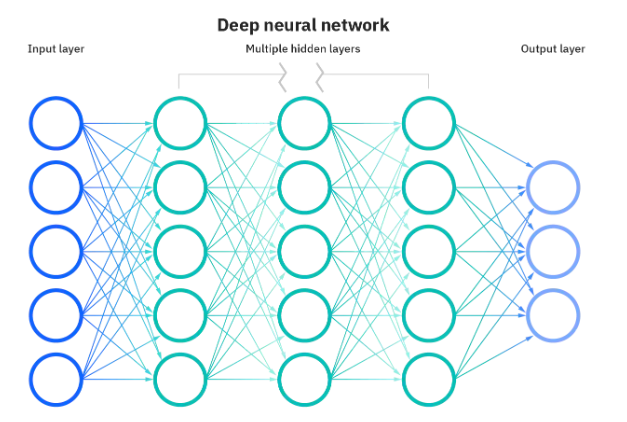

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
import warnings

classifier = Sequential()

# Erstellen des Input Layer
classifier.add(Dense(units=8, activation = 'relu', kernel_initializer="uniform", input_shape=(X_train.shape[1],)))

# Erster Hidden Layer
classifier.add(Dense(14, activation = 'relu', kernel_initializer="uniform"))
classifier.add(Dropout(0.3))

# Zweiter Hidden Layer
# classifier.add(Dense(14, activation = 'relu'))
# classifier.add(Dropout(0.3))

# Output Layer
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer="uniform"))

# Kompilieren des Neuronalen Netzes
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
start_time = time.time()
history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=8, epochs = 15, verbose=1)
end_time = time.time()

Epoch 1/15
31980/31980 [==============================] - 29s 908us/step - loss: 0.2619 - accuracy: 0.9148 - val_loss: 0.2337 - val_accuracy: 0.9126
Epoch 2/15
31980/31980 [==============================] - 26s 828us/step - loss: 0.2360 - accuracy: 0.9149 - val_loss: 0.2326 - val_accuracy: 0.9126
Epoch 3/15
31980/31980 [==============================] - 26s 825us/step - loss: 0.2340 - accuracy: 0.9149 - val_loss: 0.2321 - val_accuracy: 0.9126
Epoch 4/15
31980/31980 [==============================] - 26s 807us/step - loss: 0.2328 - accuracy: 0.9149 - val_loss: 0.2318 - val_accuracy: 0.9126
Epoch 5/15
31980/31980 [==============================] - 26s 806us/step - loss: 0.2321 - accuracy: 0.9148 - val_loss: 0.2317 - val_accuracy: 0.9126
Epoch 6/15
31980/31980 [==============================] - 26s 803us/step - loss: 0.2314 - accuracy: 0.9149 - val_loss: 0.2314 - val_accuracy: 0.9126
Epoch 7/15
31980/31980 [==============================] - 26s 809us/step - loss: 0.2304 - accuracy: 0.9154

In [49]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [51]:
# Ausgabe der Metriken + Confusionmatrix des Neuronalen Netz
from sklearn import metrics

nn_ac = metrics.accuracy_score(y_test, y_pred.round())
nn_pre = metrics.precision_score(y_test, y_pred.round())
nn_cm = metrics.confusion_matrix(y_test, y_pred.round())

nn_training = round(end_time - start_time, 2)
print(f"Trainingsdauer des Modells: {nn_training} s\n")

print('Accuacy des Modells: ', round(nn_ac, 4) * 100, " %")
print('Präzision des Modells: ', round(nn_pre, 4) * 100, " %")
print(nn_cm)

Trainingsdauer des Modells: 394.91 s

Accuacy des Modells:  91.38  %
Präzision des Modells:  60.709999999999994  %
[[58224   143]
 [ 5371   221]]


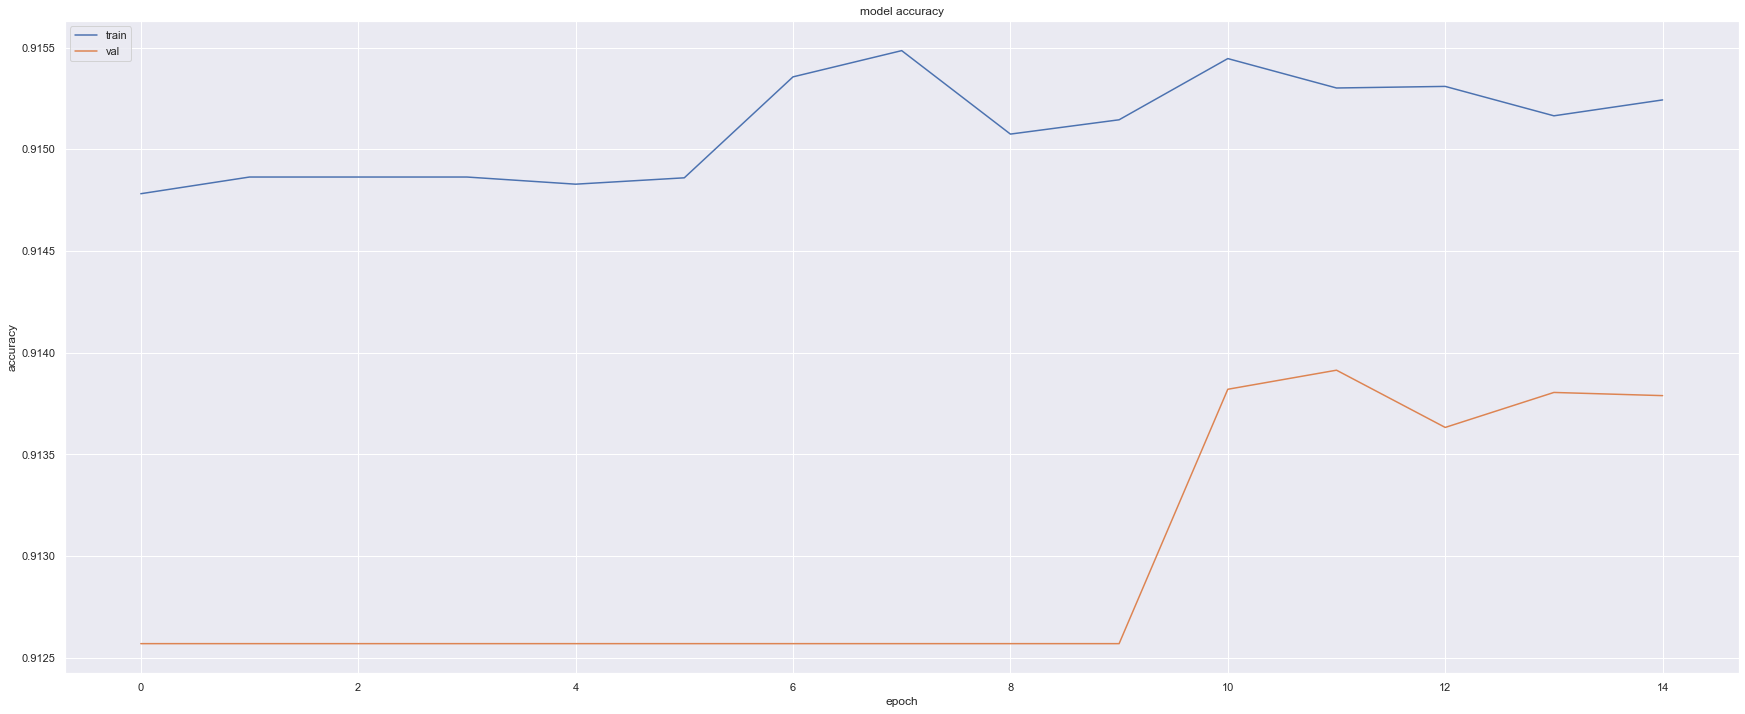

<Figure size 720x216 with 0 Axes>

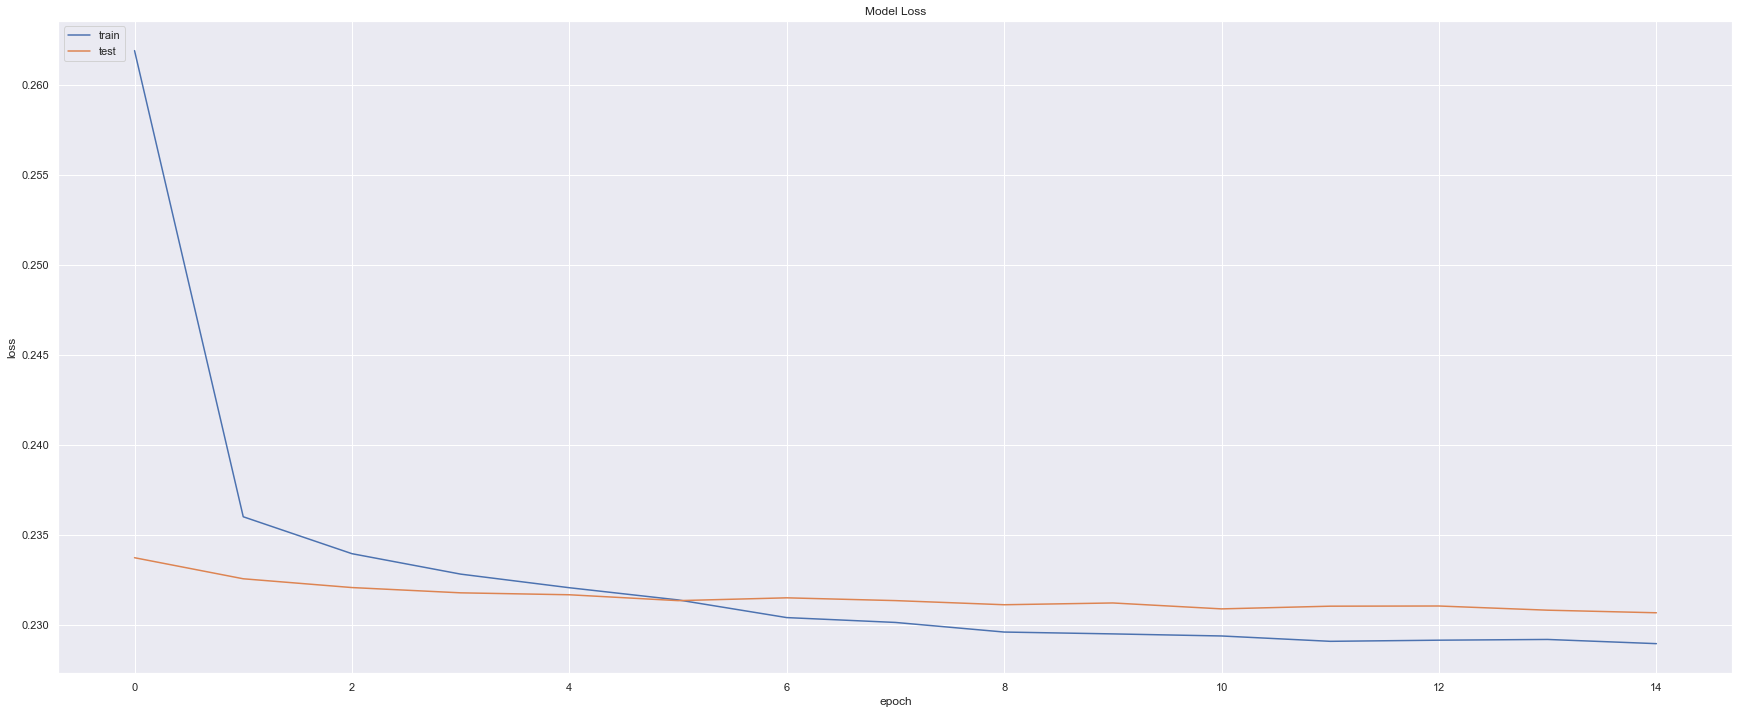

In [52]:
# Visualisieren der Accuracy und des Loss während des Trainings und Tests

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize=(10, 3))
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Modellvergleich

### Modell Genauigkeit

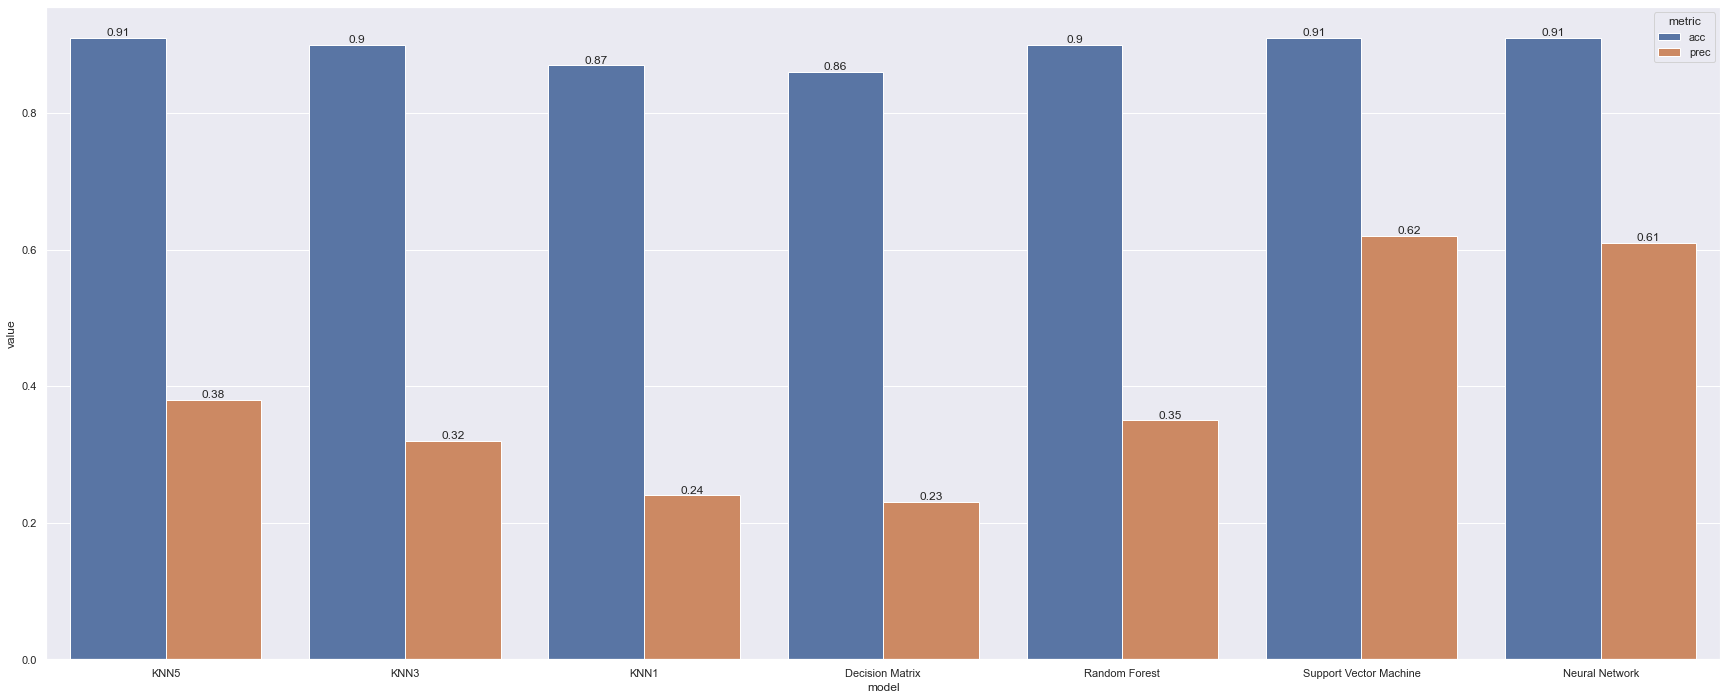

In [58]:
model_accuracies = pd.DataFrame({'value': [knn_eval['acc'], knn3_eval['acc'], knn1_eval['acc'], clf_eval['acc'], rfc_eval['acc'], svm_eval['acc'], nn_ac, 
                                           knn_eval['prec'], knn3_eval['prec'], knn1_eval['prec'], clf_eval['prec'], rfc_eval['prec'], svm_eval['prec'], nn_pre],
                                 'metric': ['acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'prec', 'prec', 'prec', 'prec', 'prec', 'prec', 'prec'],
                                 'model': ['KNN5', 'KNN3', 'KNN1', 'Decision Matrix', 'Random Forest', 'Support Vector Machine', 'Neural Network', 
                                           'KNN5', 'KNN3', 'KNN1', 'Decision Matrix', 'Random Forest', 'Support Vector Machine', 'Neural Network']})
model_accuracies['value'] = round(model_accuracies['value'], 2)
ax = sns.barplot(data=model_accuracies, y="value", x="model", hue="metric")

for container in ax.containers:
    ax.bar_label(container)

Die Übersicht zeigt, dass alle Modelle sehr gut Werte für die Metriken Accuracy und Precision aufweisen. Vergleicht man die Modelle hinsichtlich der Werte für Accuracy und Precision, weisen die Support Vector Machine und das Neuronale Netz die beste Genauigkeit auf. Mit einer Accuracy von 91% und einer Precision von 62% weisen sie im Vergleich die beste Genauigkeit auf.

Die "schlechteste" Genauigkeit weist der Decision Tree auf. Mit einer Accuracy von 86% und einer Precision von 23% liegt das Modell auf dem letzten Platz.

Bei den KNN-Modelle ist auffällig, das mit weniger Nachbarn als Konfiguration die Genauigkeit anscheinend sink. Das Modell KNN1 ist im Vergleich zu KNN5 weniger genau.

### Modell Laufzeiten

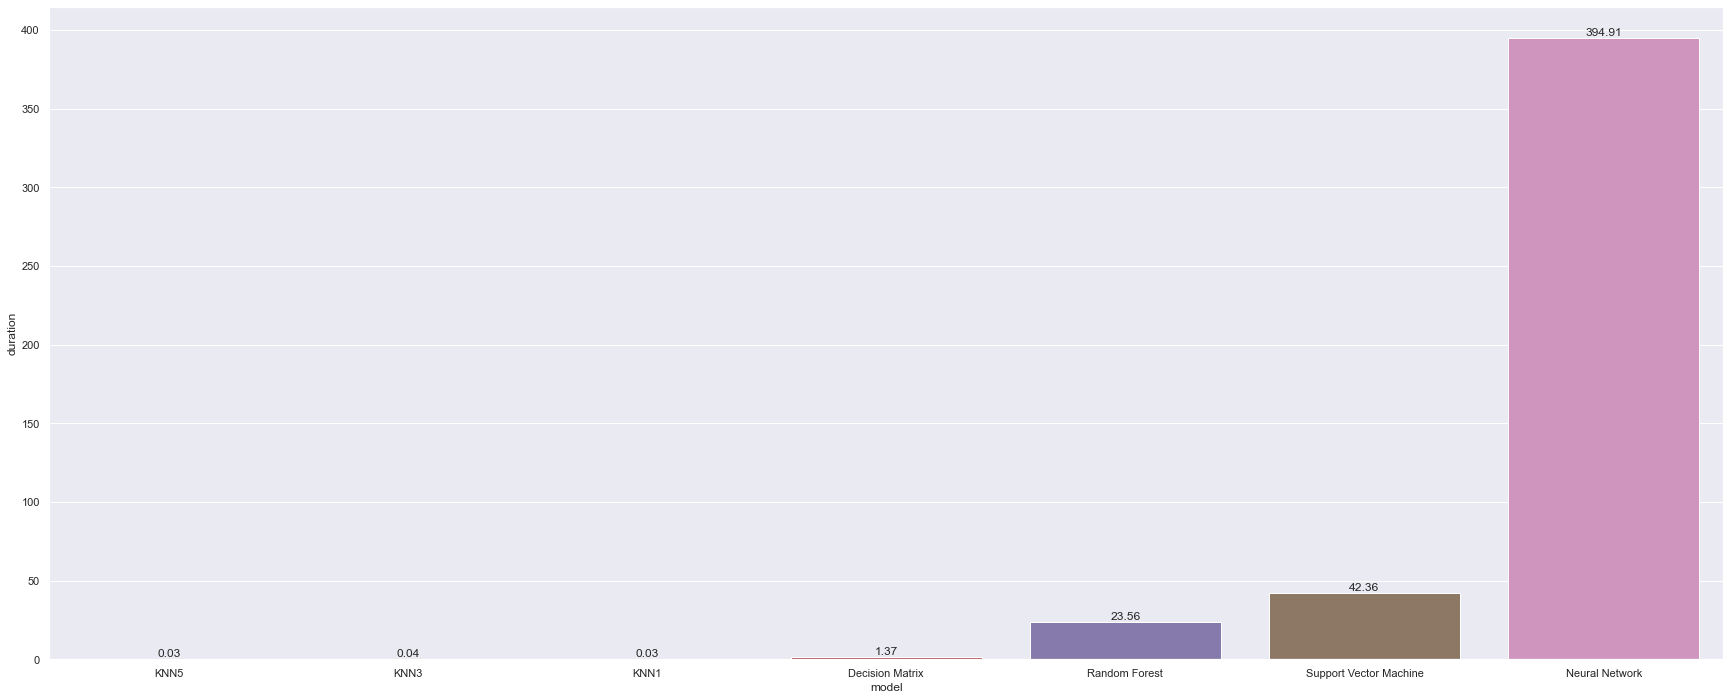

In [57]:
model_durations = pd.DataFrame({'duration': [knn_training, knn3_training, knn1_training, clf_training, rfc_training, svm_training, nn_training],
                                 'model': ['KNN5', 'KNN3', 'KNN1', 'Decision Matrix', 'Random Forest', 'Support Vector Machine', 'Neural Network']})

ax = sns.barplot(data=model_durations, y="duration", x="model")

for container in ax.containers:
    ax.bar_label(container)

Zunächst einmal können die dargestellen Zeiten stark variieren, je nachdem mit welcher Hardware die Modelle berechnet werden.

Die Trainingsdauer der K-nächste-Nachbarn Modelle sind alle sehr niedrige. Sie benötigen nur einen Bruchteil einer Sekunde, um die Vorhersagen zu treffen. Allerdings benötigen sie für die Validierung der Daten sehr lange (KNN5 > 250 Sekunden). 

Das Training für die Decision Matrix ist ebenfalls schnell mit gerade einmal 1.37 Sekunden. Die Random Forest Modell hingegen benötigt schon etwas mehr Zeit, da hier viele Bäume einzeln erzeugt werden.

Die Support Vector Machine benötigt 42.36 Sekunden.

Mit Abstand am meisten Zeit für das Trainieren des Modell benötigt das Neurale Netz. Hier benötigt das Training 394.91 Sekunden, also mehr als 6 Minuten. Hier wird in mehreren Epochen trainiert und mit variabler Batch-Größe. Die Trainingsdauer hängt also maßgeblich von diesen beiden Größen ab. 